In [1]:
%matplotlib notebook

In [2]:
import seaborn as sns
import statistics
from scipy.optimize import curve_fit

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

import cmath

In [3]:
print(matplotlib.__version__)

2.2.3


In [4]:
sns.set(style='whitegrid')

# Heat diffusion

<font color="red">*Megjegyzés:* új mérés. A méréssel kapcsolatos észrevételek segítik a feladatkitűzés pontosítását.</font>

## 1. Kalibráció szobahőrmérsékleten

A hőmérők pontosságának megállapításához először szobahőmérsékleten mérjük 10 percig a hőmérők által mutatott értékeket.

In [5]:
semmi = np.genfromtxt('semmi.dat')

<IPython.core.display.Javascript object>


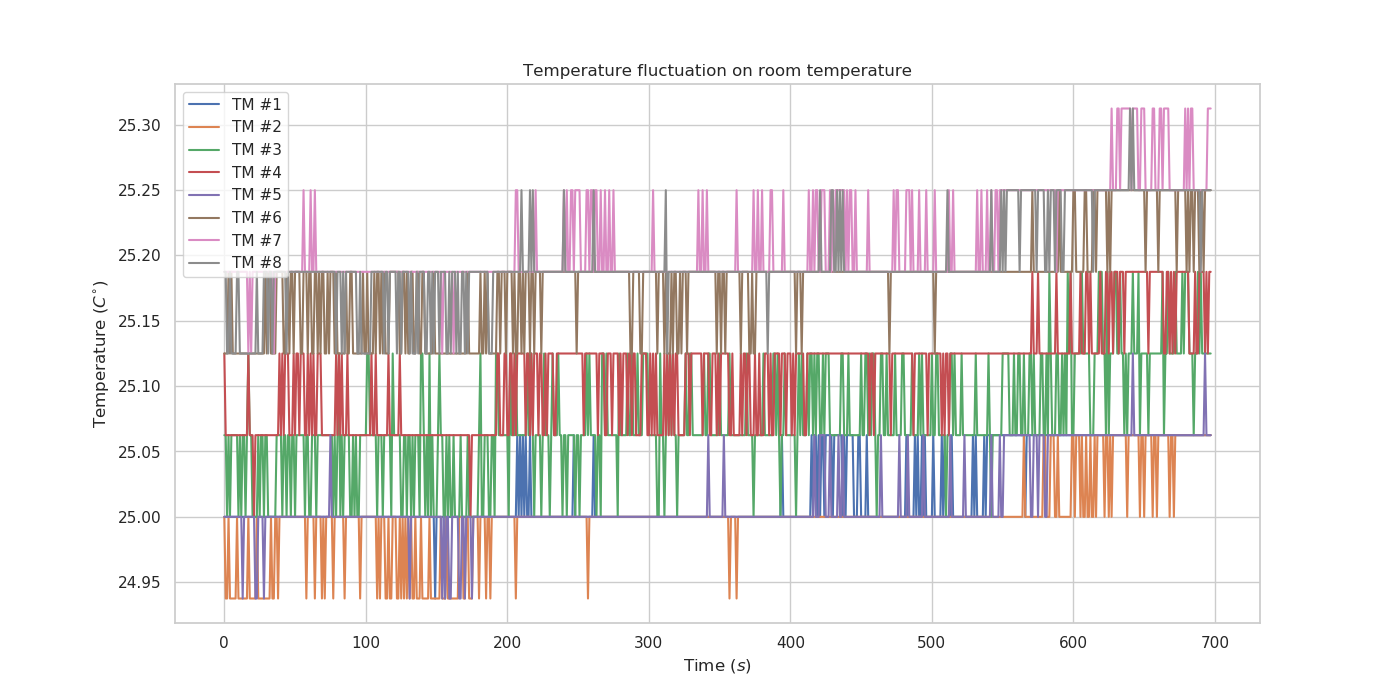

In [6]:
nrows=1
ncols=1
fig_semmi, axes_semmi = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_semmi.plot(semmi[0:,0]/1000, semmi[0:,i+1], label="TM #" + str(i+1))
    
axes_semmi.set_xlabel("Time ($s$)")
axes_semmi.set_ylabel("Temperature ($C^{\circ}$)")

axes_semmi.set_title("Temperature fluctuation on room temperature")

plt.legend()
plt.show()

### Dispersion

In [7]:
def DispersionOfData(data_array, bottom_cut, current_thermometer):

    current_disp = statistics.stdev(data_array[bottom_cut:,current_thermometer])

    return current_disp

In [8]:
disps_semmi = {}

for i in range(0,8):
    current_disp_semmi = DispersionOfData(semmi, bottom_cut=100, current_thermometer=i+1)
    disps_semmi["Thermometer #" + str(i+1)] = current_disp_semmi
    
    print("Thermometer #" + str(i+1) + " dispersion:", current_disp_semmi)

Thermometer #1 dispersion: 0.030023664405042137
Thermometer #2 dispersion: 0.029934792798437408
Thermometer #3 dispersion: 0.04301047627718004
Thermometer #4 dispersion: 0.03831781338683194
Thermometer #5 dispersion: 0.029814661986535807
Thermometer #6 dispersion: 0.034417258296770725
Thermometer #7 dispersion: 0.037374594002585394
Thermometer #8 dispersion: 0.03266883409677762


<IPython.core.display.Javascript object>


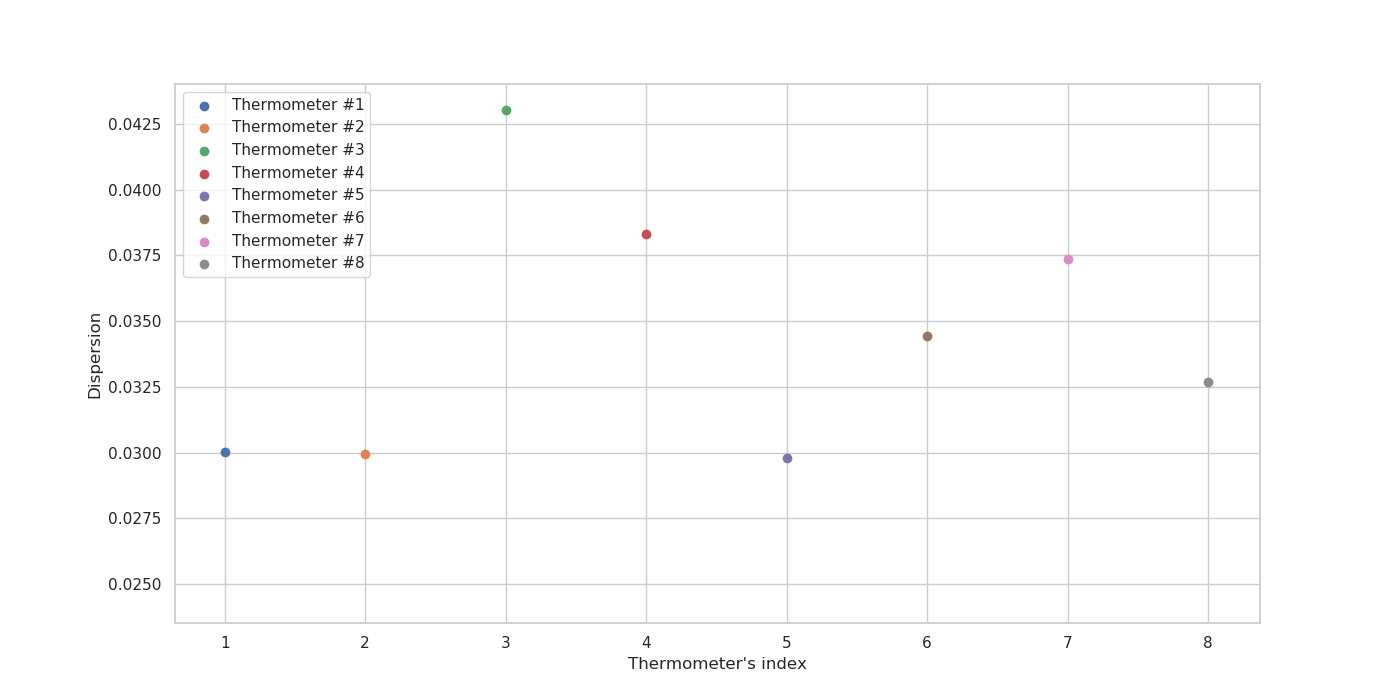

In [9]:
nrows=1
ncols=1
fig_semmi_disp, axes_semmi_disp = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_semmi_disp.scatter(i+1 ,disps_semmi["Thermometer #" + str(i+1)], label="Thermometer #" + str(i+1))
    
axes_semmi_disp.set_xlabel("Thermometer's index")
axes_semmi_disp.set_ylabel("Dispersion")
    
plt.legend()
plt.show()

### Errors of thermometers

## 2. Ellentétes peremfeltételekkel rendelkező rendszer viselkedése

A mérésben azt vizsgáljuk, hogy a rézrúd hőmérséklete hogy változik időben, ha az egyik végét elkezdjük melegíteni, míg a másikat ezzel szimután a Peltier-elemek segítségével hűteni.

A páka melegítését és a Peltier-elemek hűtési teljesítményét kb. a maximális értékek felére állítjuk. Ez maximálisan $\approx 90 C^{\circ}$-ot jelent a páka oldalán. Azért nem megyünk ennél feljebb, mert a melegítéshez közeli hőmérők által leadott jel itt már elkezd szaturálódni, valamint a rézrúdhoz történő rögzítésükhöz használt ragasztó is elkezd porladni.

### 2.1 Az adatok ábrázolása

In [10]:
hidegmeleg = np.genfromtxt('meleg_hideg.dat')

In [11]:
bottom_cut = 100
upper_cut = 2500

<IPython.core.display.Javascript object>


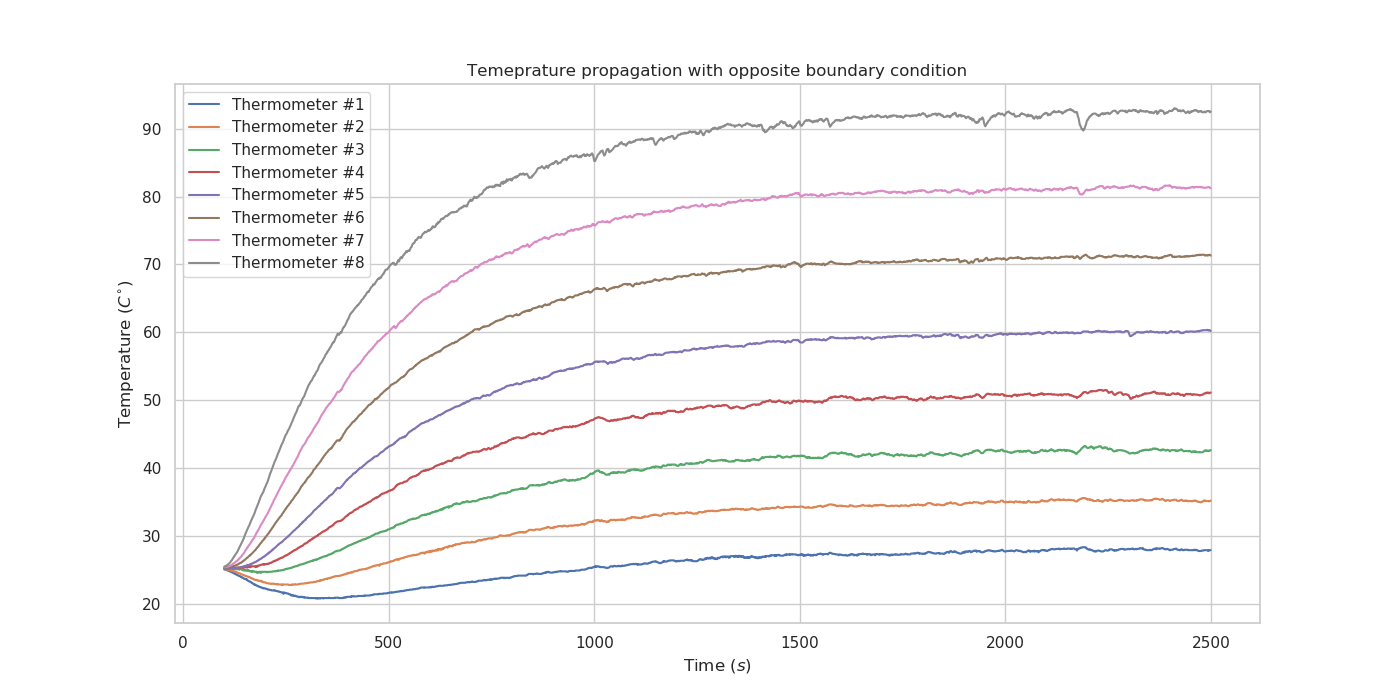

In [12]:
nrows=1
ncols=1
fig_hidegmeleg, axes_hidegmeleg = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_hidegmeleg.plot(hidegmeleg[bottom_cut:upper_cut,0]/1000, hidegmeleg[bottom_cut:upper_cut,i+1], label="Thermometer #" + str(i+1))
    
axes_hidegmeleg.set_xlabel("Time ($s$)")
axes_hidegmeleg.set_ylabel("Temperature ($C^{\circ}$)")

axes_hidegmeleg.set_title("Temeprature propagation with opposite boundary condition")

plt.legend()
plt.show()

### 2.2 Az egyes hőmérőkről kapott adatok szórásának összehasonlítása

In [13]:
disps_bound = {}

for i in range(0,8):
    current_disp_bound = DispersionOfData(hidegmeleg, bottom_cut, i+1)
    disps_bound["Thermometer #" + str(i+1)] = current_disp_bound
    
    print("Thermometer #" + str(i+1) + " dispersion:", current_disp_bound)

Thermometer #1 dispersion: 1.9972770494650545
Thermometer #2 dispersion: 3.1827628538515538
Thermometer #3 dispersion: 4.345773179806517
Thermometer #4 dispersion: 5.724639420577826
Thermometer #5 dispersion: 7.222571847875084
Thermometer #6 dispersion: 8.843240110465517
Thermometer #7 dispersion: 10.216579898025467
Thermometer #8 dispersion: 11.516946833035867


<IPython.core.display.Javascript object>


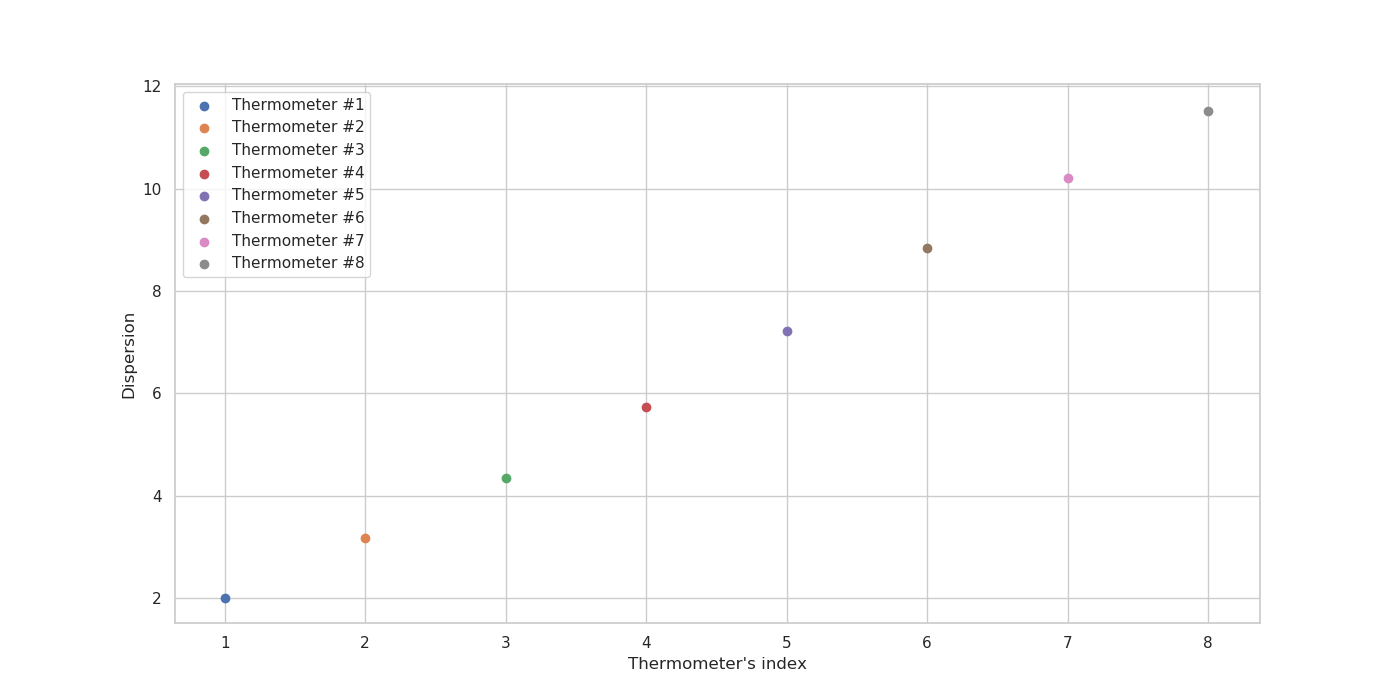

In [14]:
nrows=1
ncols=1
fig_bound_disp, axes_bound_disp = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes_bound_disp.scatter(i+1, disps_bound["Thermometer #" + str(i+1)], label="Thermometer #" + str(i+1))
    
axes_bound_disp.set_xlabel("Thermometer's index")
axes_bound_disp.set_ylabel("Dispersion")
    
plt.legend()
plt.show()

In [15]:
plottable = 1

<IPython.core.display.Javascript object>


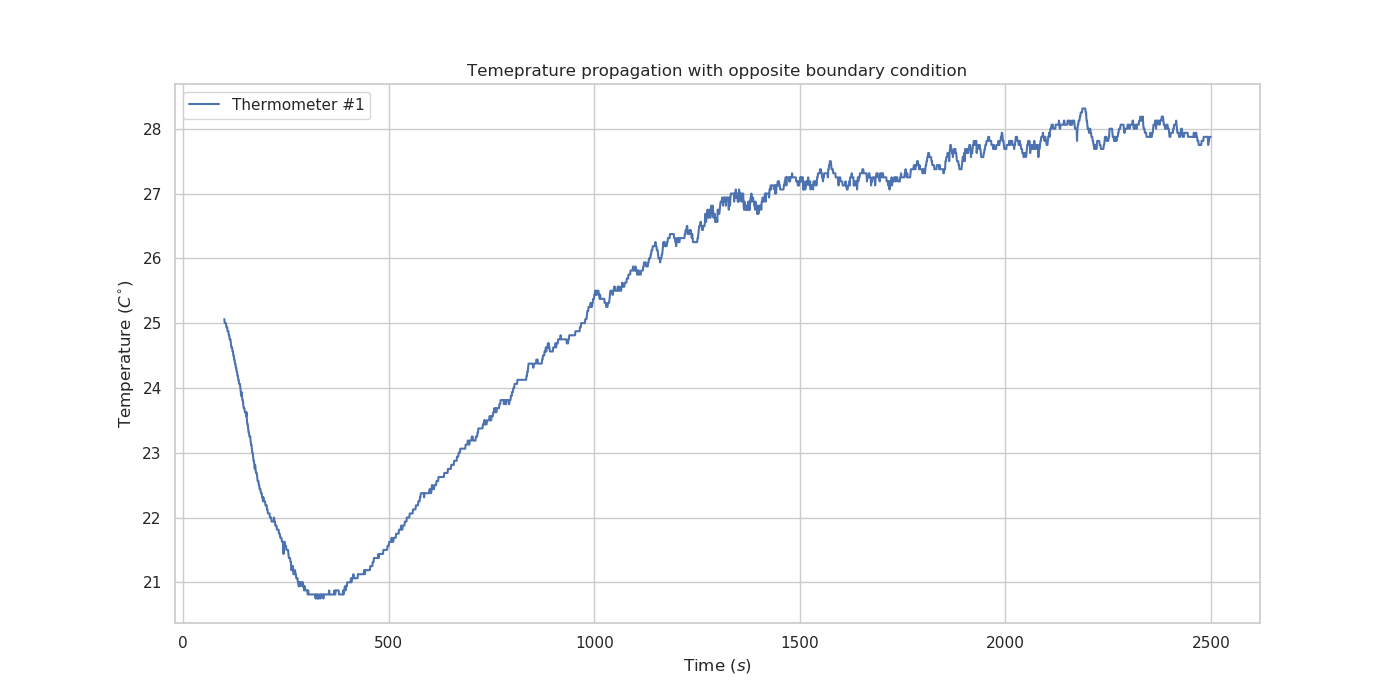

In [16]:
nrows=1
ncols=1
fig_hidegmeleg_one, axes_hidegmeleg_one = plt.subplots(figsize=(14,7))

axes_hidegmeleg_one.plot(hidegmeleg[bottom_cut:upper_cut,0]/1000, hidegmeleg[bottom_cut:upper_cut,plottable], label="Thermometer #" + str(plottable))
    
axes_hidegmeleg_one.set_xlabel("Time ($s$)")
axes_hidegmeleg_one.set_ylabel("Temperature ($C^{\circ}$)")

axes_hidegmeleg_one.set_title("Temeprature propagation with opposite boundary condition")

plt.legend()
plt.show()

In [17]:
def fit_func(t, A, B, C):
    #return A + B * np.e ** (C * t + offset)
    return A + B * np.e ** (C * t)

In [18]:
def value_prep(prep, offset, plottable):
    
    # t = inf: exp(C * t(inf) + offset) = 0
    A = hidegmeleg[-prep:,plottable].mean()

    # t = 0: exp(C * t(0) + offset) = 1
    B = hidegmeleg[offset:offset+prep,plottable].mean() - A
    
    dt = int((len(hidegmeleg[offset:upper_cut,0]) + offset) / 2)
    
    '''print(hidegmeleg[dt:dt+prep,plottable].mean())
    print((hidegmeleg[dt:dt+prep,plottable].mean() - A))
    print((hidegmeleg[dt:dt+prep,plottable].mean() - A)/B)'''
    
    # y = A + B * np.e ** (C * t)
    # C = ln((y - A) / B) / t
    C = np.log((hidegmeleg[dt:dt+prep,plottable].mean() - A) / B) / hidegmeleg[dt:dt+prep,0].mean()
    
    #print("Characteristic time:", (-1/C)/1000, "s")
    
    return A, B, C

In [19]:
offset_test = 450
p0_test = value_prep(prep=5, offset=offset_test, plottable=plottable)
print(p0_test)

x_test = hidegmeleg[bottom_cut:upper_cut,0]
y_test = hidegmeleg[bottom_cut:upper_cut,plottable]
popt_test, pcov_test = curve_fit(fit_func, x_test, y_test, p0=p0_test)
perr_test = np.sqrt(np.diag(pcov_test))

(28.4, -7.212499999999999, -9.998936068684606e-07)


### Legkisebb illesztési hiba keresése

In [20]:
def MinimumErrors(current_tm, offset_max):
    
    perr_currentA = np.empty(offset_max+1)
    perr_currentB = np.empty(offset_max+1)
    perr_currentC = np.empty(offset_max+1)
    
    for offset_index in range(0,offset_max+1):
        offset = offset_index
        p0_current = value_prep(prep=5, offset=offset, plottable=current_tm)

        x_current = hidegmeleg[offset:upper_cut,0]
        y_current = hidegmeleg[offset:upper_cut,i+1]
        popt_current, pcov_current = curve_fit(fit_func, x_current, y_current, p0=p0_current)
        perr_currentA[offset_index], perr_currentB[offset_index], perr_currentC[offset_index] = np.sqrt(np.diag(pcov_current))

    return(perr_currentA, perr_currentB, perr_currentC)

In [21]:
perr_A = {}
perr_B = {}
perr_C = {}

for i in range(0,8):
    perr_A[str(i+1)], perr_B[str(i+1)], perr_C[str(i+1)] = MinimumErrors(current_tm=i+1, offset_max=800)
    #print(i+1, "ok")

In [22]:
def PlotErrors(perr_A, perr_B, perr_C, offset_max):
    
    fig, axes = plt.subplots(figsize=(10,6))
    
    axes.set_xlabel('Time [$s$]')
    axes.set_ylabel('Errors')
    
    for i in range(0,8):
        axes.plot(np.linspace(0,offset_max,offset_max+1), perr_A[str(i+1)], label='Min error for TM #' + str(i+1) + ' at: ' + 
                                                                 str(int(np.where(perr_A[str(i+1)] == min(perr_A[str(i+1)]))[0])) +
                                                                 ' s')
        #axes.plot(np.linspace(0,offset_max,offset_max+1), perr_B[str(i+1)])
        #axes.plot(np.linspace(0,offset_max,offset_max+1), perr_C[str(i+1)])
        
        axes.set_ylim(0,0.075)

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


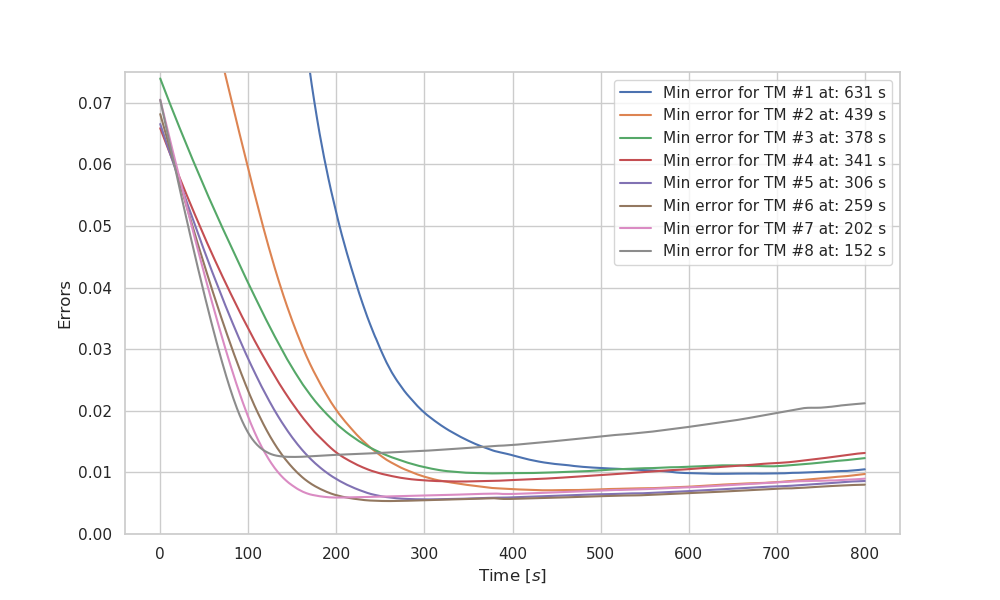

In [65]:
PlotErrors(perr_A, perr_B, perr_C, offset_max=800)

### Melegedési görbék illesztése

In [23]:
p0_arr = {} #np.empty((8,3))
x_arr_fit = {} #np.empty((8,len(hidegmeleg[bottom_cut:upper_cut,0])))
y_arr_fit = {} #np.empty((8,len(hidegmeleg[bottom_cut:upper_cut,i])))
popt_arr = {} #np.empty((8,3))
perr_arr = {} #np.empty((8,3))


for i in range(0,8):
    offset = int(np.where(perr_A[str(i+1)] == min(perr_A[str(i+1)]))[0])
    p0_arr[str(i)] = value_prep(prep=5, offset=offset, plottable=(i+1))

    x_arr_fit[str(i)] = hidegmeleg[offset:upper_cut,0]
    y_arr_fit[str(i)] = hidegmeleg[offset:upper_cut,i+1]
    popt_arr[str(i)], pcov_curr = curve_fit(fit_func, x_arr_fit[str(i)], y_arr_fit[str(i)], p0=p0_arr[str(i)])
    perr_arr[str(i)] = np.sqrt(np.diag(pcov_curr))

In [27]:
p0_arr

{'0': (28.4, -5.762499999999999, -8.206293532072458e-07),
 '1': (35.8, -10.724999999999998, -1.1874683038143135e-06),
 '2': (43.1875, -15.3625, -1.450155941165945e-06),
 '3': (51.3125, -20.625, -1.7097612739561348e-06),
 '4': (60.425, -27.424999999999997, -1.797931303813314e-06),
 '5': (71.9625, -37.050000000000004, -1.8931475126224111e-06),
 '6': (82.2, -49.050000000000004, -2.0917030820870112e-06),
 '7': (92.6875, -62.025, -2.3251377405121056e-06)}

In [24]:
-1.0/(p0_arr['7'][2])/1000

430.08204743162986

### Illesztési paraméterek

| TM # | A       | B        | C           | $\frac{1}{C}\ (\tau)$ (in seconds) |
|------|---------|---------:| -----------:|--------------------------:|
| 1    | 28.4    | -5.7625  | -8.2063e-07 | 1218.57                   |
| 2    | 35.8    | -10.725  | -1.1875e-06 | 842.13                    |
| 3    | 43.1875 | -15.3625 | -1.4502e-06 | 689.58                    |
| 4    | 51.3125 | -20.625  | -1.7098e-06 | 584.88                    |
| 5    | 60.425  | -27.425  | -1.7979e-06 | 556.19                    |
| 6    | 71.9625 | -37.05   | -1.8931e-06 | 528.22                    |
| 7    | 82.2    | -49.05   | -2.0917e-06 | 478.08                    |
| 8    | 92.6875 | -62.025  | -2.3251e-06 | 430.08                    |

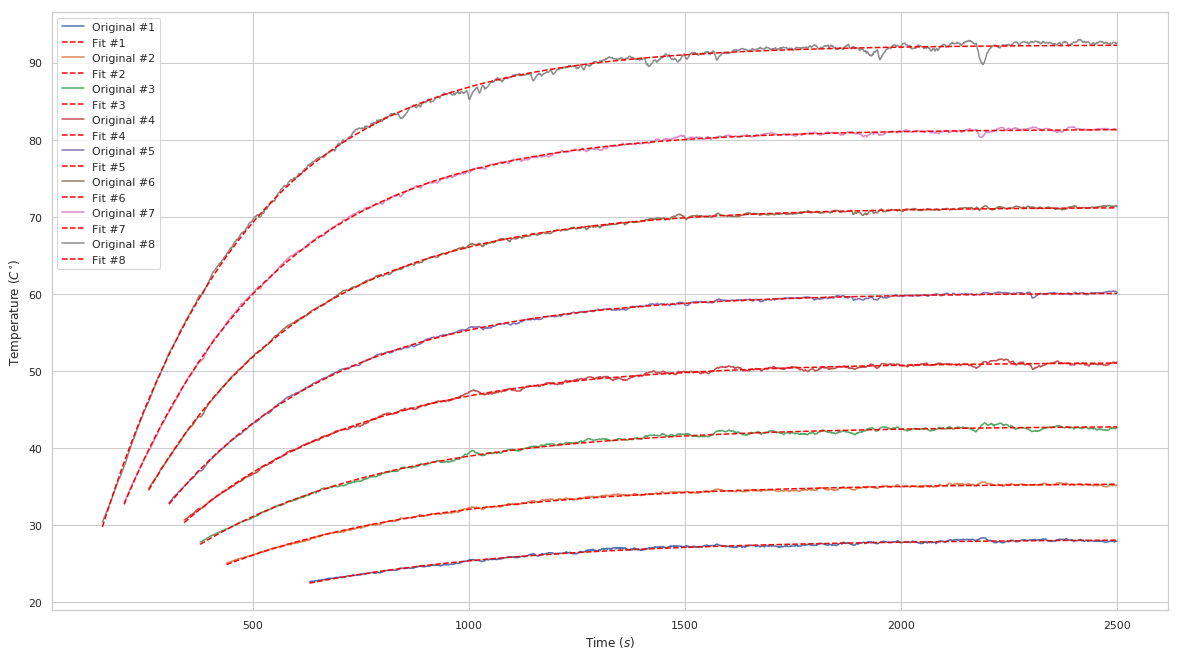

In [29]:
nrows=1
ncols=1
fig_fit, axes_fit = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,11))

for i in range(0,8):
    axes_fit.plot(x_arr_fit[str(i)]/1000, y_arr_fit[str(i)], label='Original #' + str(i+1))
    axes_fit.plot(x_arr_fit[str(i)]/1000, fit_func(x_arr_fit[str(i)], *popt_arr[str(i)]), c='red', linestyle='--', label='Fit #' + str(i+1))

axes_fit.set_xlabel("Time ($s$)")
axes_fit.set_ylabel("Temperature ($C^{\circ}$)")


plt.legend()
plt.show()

<IPython.core.display.Javascript object>


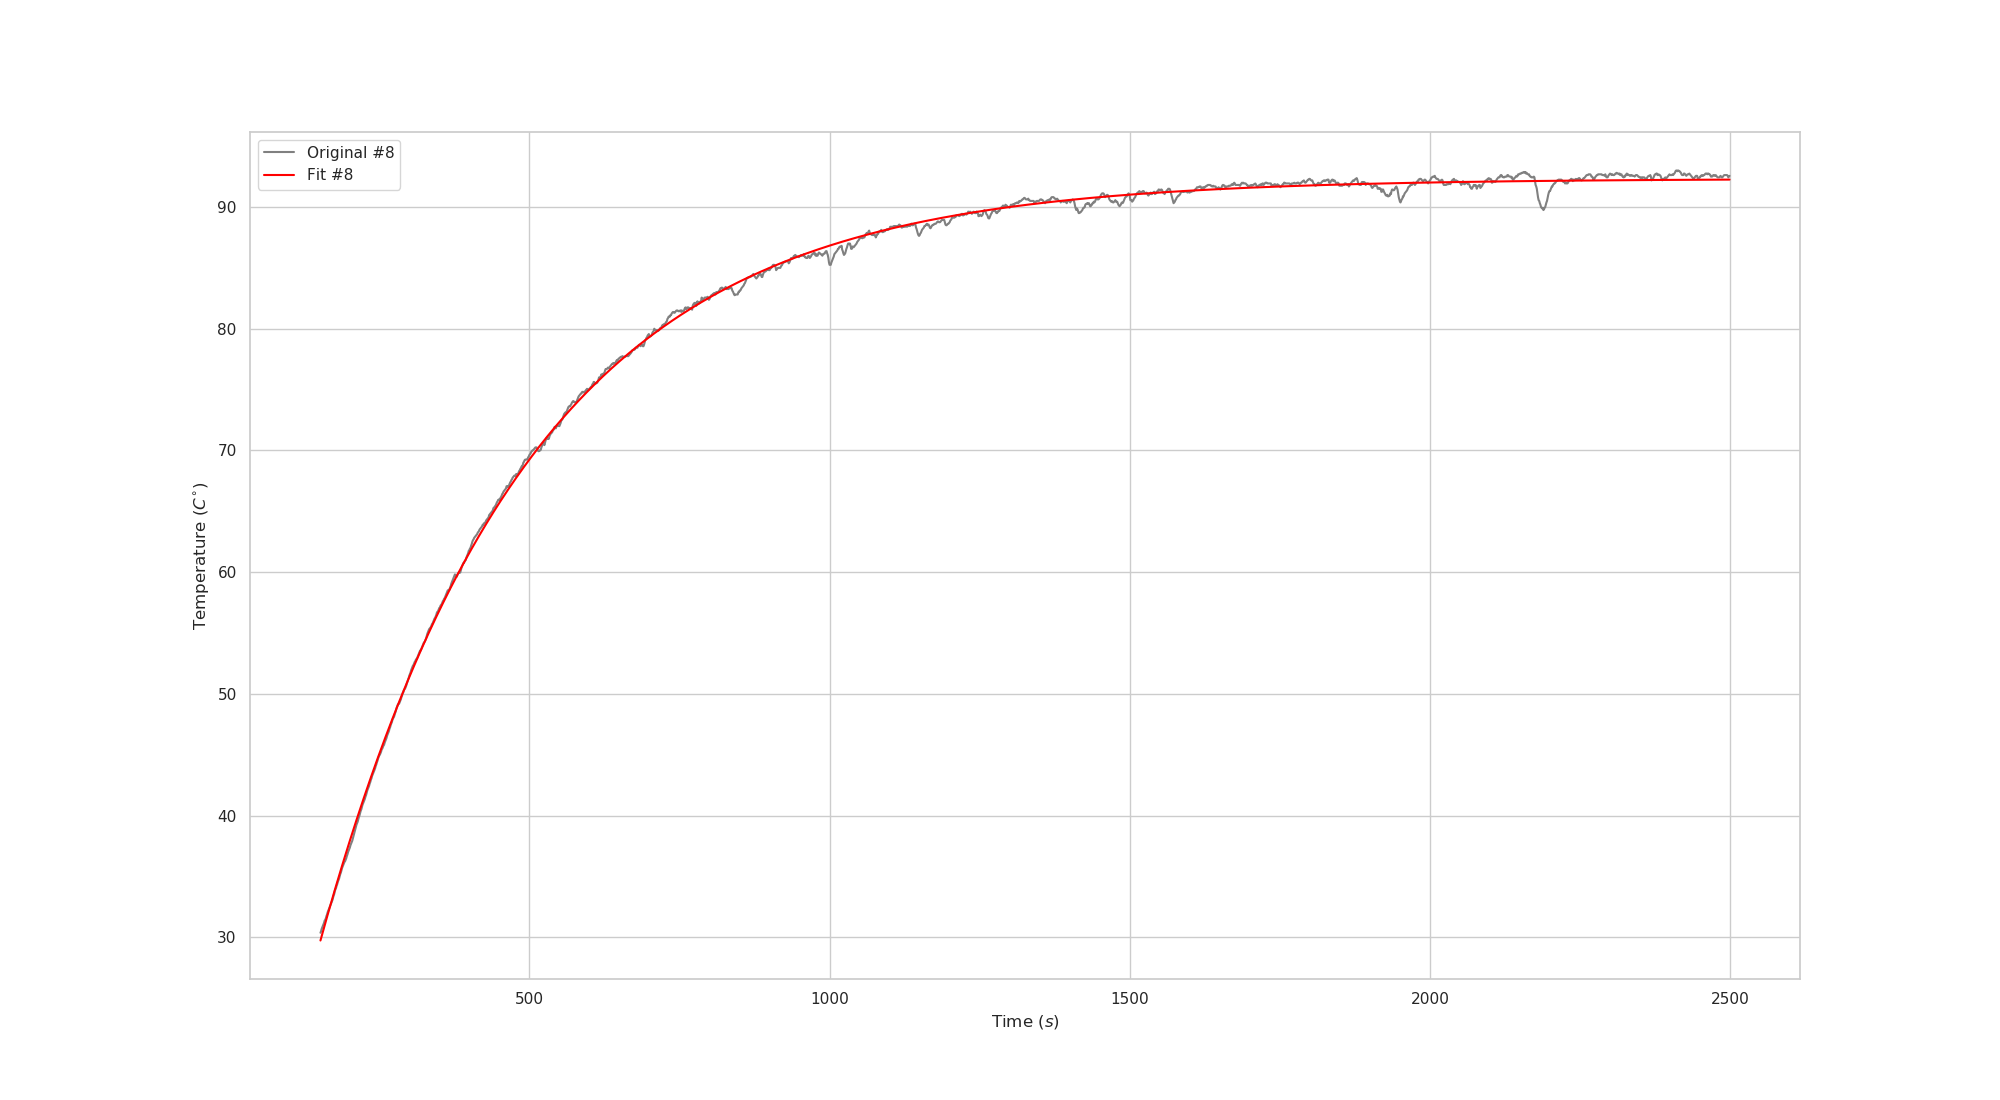

In [25]:
nrows=1
ncols=1
fig_fit_one, axes_fit_one = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,11))

plotting = 8

axes_fit_one.plot(x_arr_fit[str(plotting-1)]/1000, y_arr_fit[str(plotting-1)], c='grey', label='Original #' + str(plotting))
axes_fit_one.plot(x_arr_fit[str(plotting-1)]/1000, fit_func(x_arr_fit[str(plotting-1)], *popt_arr[str(plotting-1)]), c='red', label='Fit #' + str(plotting))

axes_fit_one.set_xlabel("Time ($s$)")
axes_fit_one.set_ylabel("Temperature ($C^{\circ}$)")

plt.legend()
plt.show()

### A hőmérséklet $u(x,t)$ függése - animáció

In [60]:
x_arr_hg = np.linspace(1,8,8)

<IPython.core.display.Javascript object>


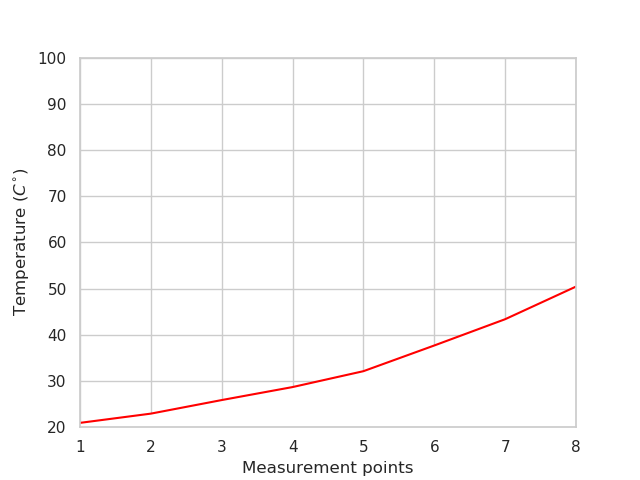

In [62]:
nrows=1
ncols=1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)


line, = axes.plot([], [], c='red')

axes.set_xlim(1,8)
axes.set_ylim(20,100)

axes.set_xlabel("Measurement points")
axes.set_ylabel("Temperature ($C^{\circ}$)")


def animate(current_time):

    x_arr_hg = np.linspace(1,8,8)
    y_arr = np.empty(8)
    
    for i in range(0,8):
        y_arr[i] = hidegmeleg[current_time, i+1]

    # Clear fill_between canvas
    axes.collections.clear()
    
    line.set_data(x_arr_hg, y_arr)
    
    axes.fill_between(x_arr_hg, y_arr, 8, color='w')

    return line,

steps = [i for i in range(bottom_cut, upper_cut+1)]
anim = FuncAnimation(fig=fig, func=animate, frames=steps, interval=20, blit=False, repeat=True)

plt.show()

## 3. A rendszer egyik végének rángatása, a fent meghatározott karakterisztikus időkkel összemérhető nagyságú idő szerint ($=400\ s$)

In [28]:
gerj = np.genfromtxt('hullam.dat')

<IPython.core.display.Javascript object>


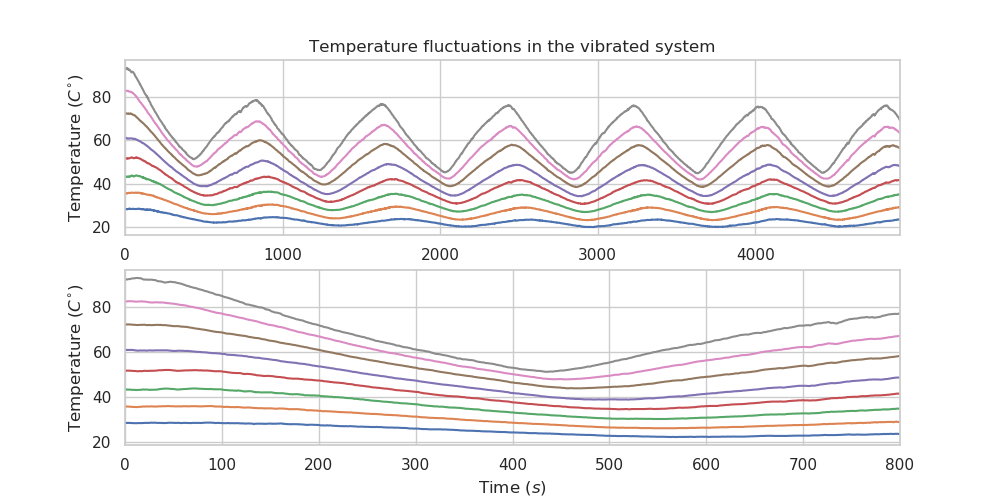

In [29]:
nrows=2
ncols=1
fig_gerj, axes_gerj = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,5))

min_lim_gerj = 0
max_lim_gerj = 800

for i in range(0,8):
    axes_gerj[0].plot(gerj[:,0]/1000, gerj[:,i+1], label="Thermometer #" + str(i+1))
    axes_gerj[1].plot(gerj[min_lim_gerj:max_lim_gerj,0]/1000, gerj[min_lim_gerj:max_lim_gerj,i+1], label="Thermometer #" + str(i+1))

axes_gerj[0].set_xlim(min(gerj[:,0]/1000), max(gerj[:,0]/1000))
axes_gerj[1].set_xlim(min_lim_gerj, max_lim_gerj)
    
axes_gerj[0].set_ylabel("Temperature ($C^{\circ}$)")

axes_gerj[1].set_xlabel("Time ($s$)")
axes_gerj[1].set_ylabel("Temperature ($C^{\circ}$)")

axes_gerj[0].set_title("Temperature fluctuations in the vibrated system")

#plt.legend()
plt.show()

### Hőmérsékletcsökkenés - lineáris "illesztés"

In [30]:
def TempDrop():
    
    temp_drop_data = {}
    tempdrop_speed = np.empty(8)
    
    for i in range(0,8):
        
        min_time = np.median(np.where(gerj[min_lim_gerj:max_lim_gerj,i+1] == min(gerj[min_lim_gerj:max_lim_gerj,i+1]))[0])
        max_time = np.median(np.where(gerj[min_lim_gerj:max_lim_gerj,i+1] == max(gerj[min_lim_gerj:max_lim_gerj,i+1]))[0])
        
        temp_drop = max(gerj[min_lim_gerj:max_lim_gerj,i+1]) - min(gerj[min_lim_gerj:max_lim_gerj,i+1])
        
        temp_drop_data[str(i+1)] = [min_time, max_time, temp_drop]
        
        tempdrop_speed[i] = temp_drop_data[str(i+1)][2] / (temp_drop_data[str(i+1)][0] - temp_drop_data[str(i+1)][1])
        
    return temp_drop_data, tempdrop_speed

In [31]:
temp_drop_data, tempdrop_speed = TempDrop()

In [32]:
temp_drop_data

{'1': [568.0, 85.0, 6.4375],
 '2': [557.0, 84.5, 9.875],
 '3': [552.5, 71.5, 13.625],
 '4': [511.0, 43.5, 17.5625],
 '5': [519.0, 4.0, 22.1875],
 '6': [466.0, 3.0, 28.5],
 '7': [455.5, 5.0, 34.875],
 '8': [435.0, 12.5, 41.875]}

<IPython.core.display.Javascript object>


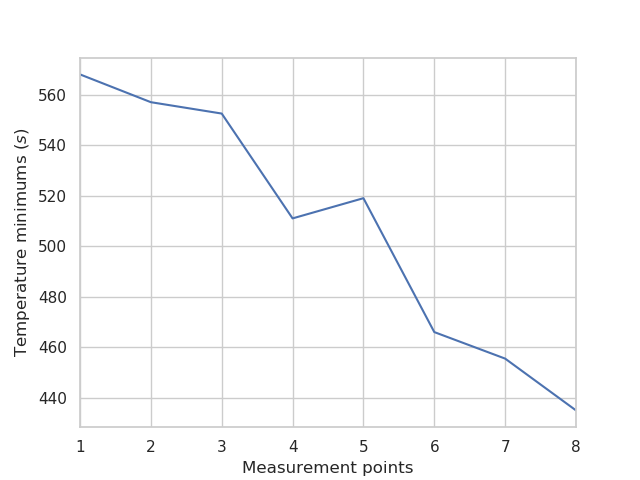

In [33]:
figtest, axestest = plt.subplots()

x = np.linspace(1,8,8)
y = np.empty(8)

axestest.set_xlim(1,8)

axestest.set_xlabel("Measurement points")
axestest.set_ylabel("Temperature minimums ($s$)")

for i in range(0,8):
    
    y[i] = temp_drop_data[str(i+1)][0]

axestest.plot(x,y)

plt.show()

In [34]:
for i in range(0,8):
    
    print("Temperature drop \"speed\" for TM #" + str(i+1) + ":", tempdrop_speed[i], "C°/s")

Temperature drop "speed" for TM #1: 0.01332815734989648 C°/s
Temperature drop "speed" for TM #2: 0.0208994708994709 C°/s
Temperature drop "speed" for TM #3: 0.028326403326403328 C°/s
Temperature drop "speed" for TM #4: 0.037566844919786097 C°/s
Temperature drop "speed" for TM #5: 0.04308252427184466 C°/s
Temperature drop "speed" for TM #6: 0.061555075593952485 C°/s
Temperature drop "speed" for TM #7: 0.07741398446170922 C°/s
Temperature drop "speed" for TM #8: 0.09911242603550297 C°/s


### Heat equation

Generally in 3 dimension, the heat equation states the following:

$$
\frac{\partial u}{\partial t}
-
\alpha \left(
\frac{\partial^{2} u}{\partial x^{2}}
+
\frac{\partial^{2} u}{\partial y^{2}}
+
\frac{\partial^{2} u}{\partial z^{2}}
\right) = 0
$$

In our measurement, we treat the copper rod as a 1D system, so the heat equation simplifies in the form as follows:

$$
\frac{\partial u}{\partial t}
-
\alpha \left(
\frac{\partial^{2} u}{\partial x^{2}}
\right) = 0
$$

The solution for this equation:

$$
u \left( x,t \right) =
\sum\limits_{n = 1}^\infty
B_{n}
\cdot
\sin{\left( \frac{n \pi x}{L} \right)}
\cdot
{e}^{{- k \left( \tfrac{n \pi}{L} \right)}^{2}} \cdot t
$$

This solution will satisfy any initial condition that can be written in the form:

$$
u \left( x,0 \right)
=
\sum\limits_{n = 1}^{M} {B_n}
\cdot
\sin{\left( \frac{n \pi x}{L} \right)}
$$

Thus $B_{n}$ could be calculated as follows:

$$
B_{n}
=
\frac{2}{L} \int_{\ 0}^{\ L} u \left( x,0 \right)
\cdot
\sin{\left( \frac{n \pi x}{L} \right)}\ dx
\quad
\text{n} = 1,2,3, \ldots
$$

### A hőmérséklet $u(x,t)$ függése - animáció

<IPython.core.display.Javascript object>


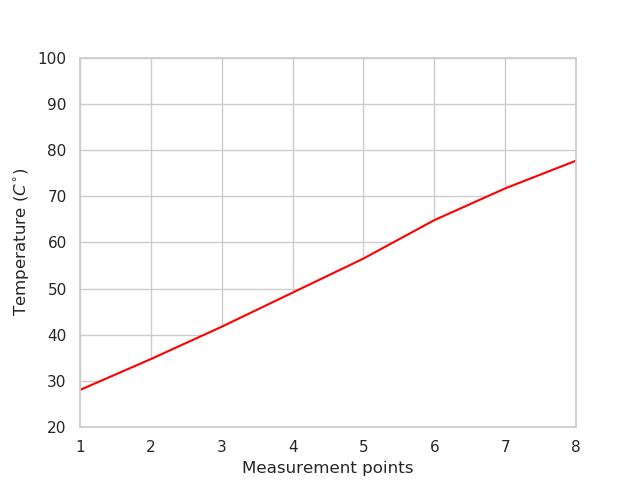

In [63]:
nrows=1
ncols=1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

line, = axes.plot([], [], c='red')

axes.set_xlim(1,8)
axes.set_ylim(20,100)

axes.set_xlabel("Measurement points")
axes.set_ylabel("Temperature ($C^{\circ}$)")


def init_func():

    line.set_data([], [])
    return line,

def animate(current_time):
    
    y_arr_gerj = np.empty(8)
    
    for i in range(0,8):
        y_arr_gerj[i] = gerj[current_time, i+1]

    # Clear fill_between canvas
    axes.collections.clear()
        
    line.set_data(x_arr_hg, y_arr_gerj)
    
    axes.fill_between(x_arr_hg, y_arr_gerj, 8, color='w')

    return line,

steps = [i for i in range(bottom_cut, upper_cut+1)]
anim = FuncAnimation(fig=fig, func=animate, init_func=init_func, frames=steps, interval=20, blit=True, repeat=True)

plt.show()

## Összehasonlítás

### A hőmérséklet $u(x,t)$ függése - animáció

<IPython.core.display.Javascript object>


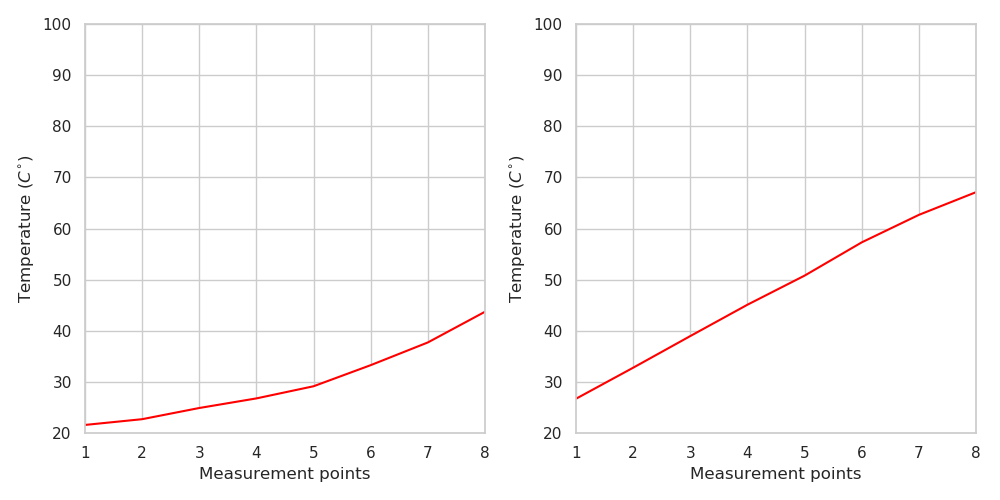

In [64]:
y_arr_1 = np.empty(8)
y_arr_2 = np.empty(8)

nrows=1
ncols=2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,5))

line_1, = axes[0].plot([], [], c='red')
line_2, = axes[1].plot([], [], c='red')


axes[0].set_xlim(1,8)
axes[0].set_ylim(20,100)

axes[1].set_xlim(1,8)
axes[1].set_ylim(20,100)

axes[0].set_xlabel("Measurement points")
axes[0].set_ylabel("Temperature ($C^{\circ}$)")
axes[1].set_xlabel("Measurement points")
axes[1].set_ylabel("Temperature ($C^{\circ}$)")

def init_func():

    line_1.set_data([], [])
    line_2.set_data([], [])
    
    return line_1, line_2,

def animate(current_time):
    
    for i in range(0,8):
        y_arr_1[i] = hidegmeleg[current_time, i+1]
        y_arr_2[i] = gerj[current_time, i+1]

    # Clear fill_between canvas
    axes[0].collections.clear()
    axes[1].collections.clear()    
    
    line_1.set_data(x_arr_hg, y_arr_1)
    line_2.set_data(x_arr_hg, y_arr_2)
    
    axes[0].fill_between(x_arr_hg, y_arr_1, 8, color='w')
    axes[1].fill_between(x_arr_hg, y_arr_2, 8, color='w')

    return line_1, line_2,

steps = [i for i in range(bottom_cut, upper_cut+1)]
anim = FuncAnimation(fig=fig, func=animate, init_func=init_func, frames=steps, interval=20, blit=False, repeat=True)

fig.tight_layout()
plt.show()

## Fit on the $\frac{\partial^{2} u}{\partial{x}^{2}}$ part

In [37]:
def linear_part(point, A, B):
    
    return A + B * point**2

In [38]:
times_arr_hideg = hidegmeleg[bottom_cut:upper_cut,0]
temps_arr_hideg = hidegmeleg[bottom_cut:upper_cut,1:9]

In [39]:
temps_arr_hideg

array([[25.0625, 25.0625, 25.1875, ..., 25.3125, 25.375 , 25.4375],
       [25.    , 25.0625, 25.125 , ..., 25.3125, 25.375 , 25.4375],
       [25.    , 25.0625, 25.1875, ..., 25.3125, 25.375 , 25.5   ],
       ...,
       [27.875 , 35.125 , 42.5625, ..., 71.4375, 81.3125, 92.4375],
       [27.875 , 35.125 , 42.625 , ..., 71.375 , 81.25  , 92.5   ],
       [27.875 , 35.1875, 42.625 , ..., 71.3125, 81.25  , 92.5625]])

In [40]:
popt_linear = []
pcov_linear = []
perr_linear = []

for i in range(0, len(temps_arr_hideg)):
    popt_current, pcov_current = curve_fit(linear_part, x_arr_hg, temps_arr_hideg[i], p0=[20, 1])
    perr_current = np.sqrt(np.diag(pcov_current))
    
    popt_linear.append(popt_current)
    pcov_linear.append(pcov_current)
    perr_linear.append(perr_current)
    
popt_linear = np.asarray(popt_linear)
pcov_linear = np.asarray(pcov_linear)
perr_linear = np.asarray(perr_linear)

<IPython.core.display.Javascript object>


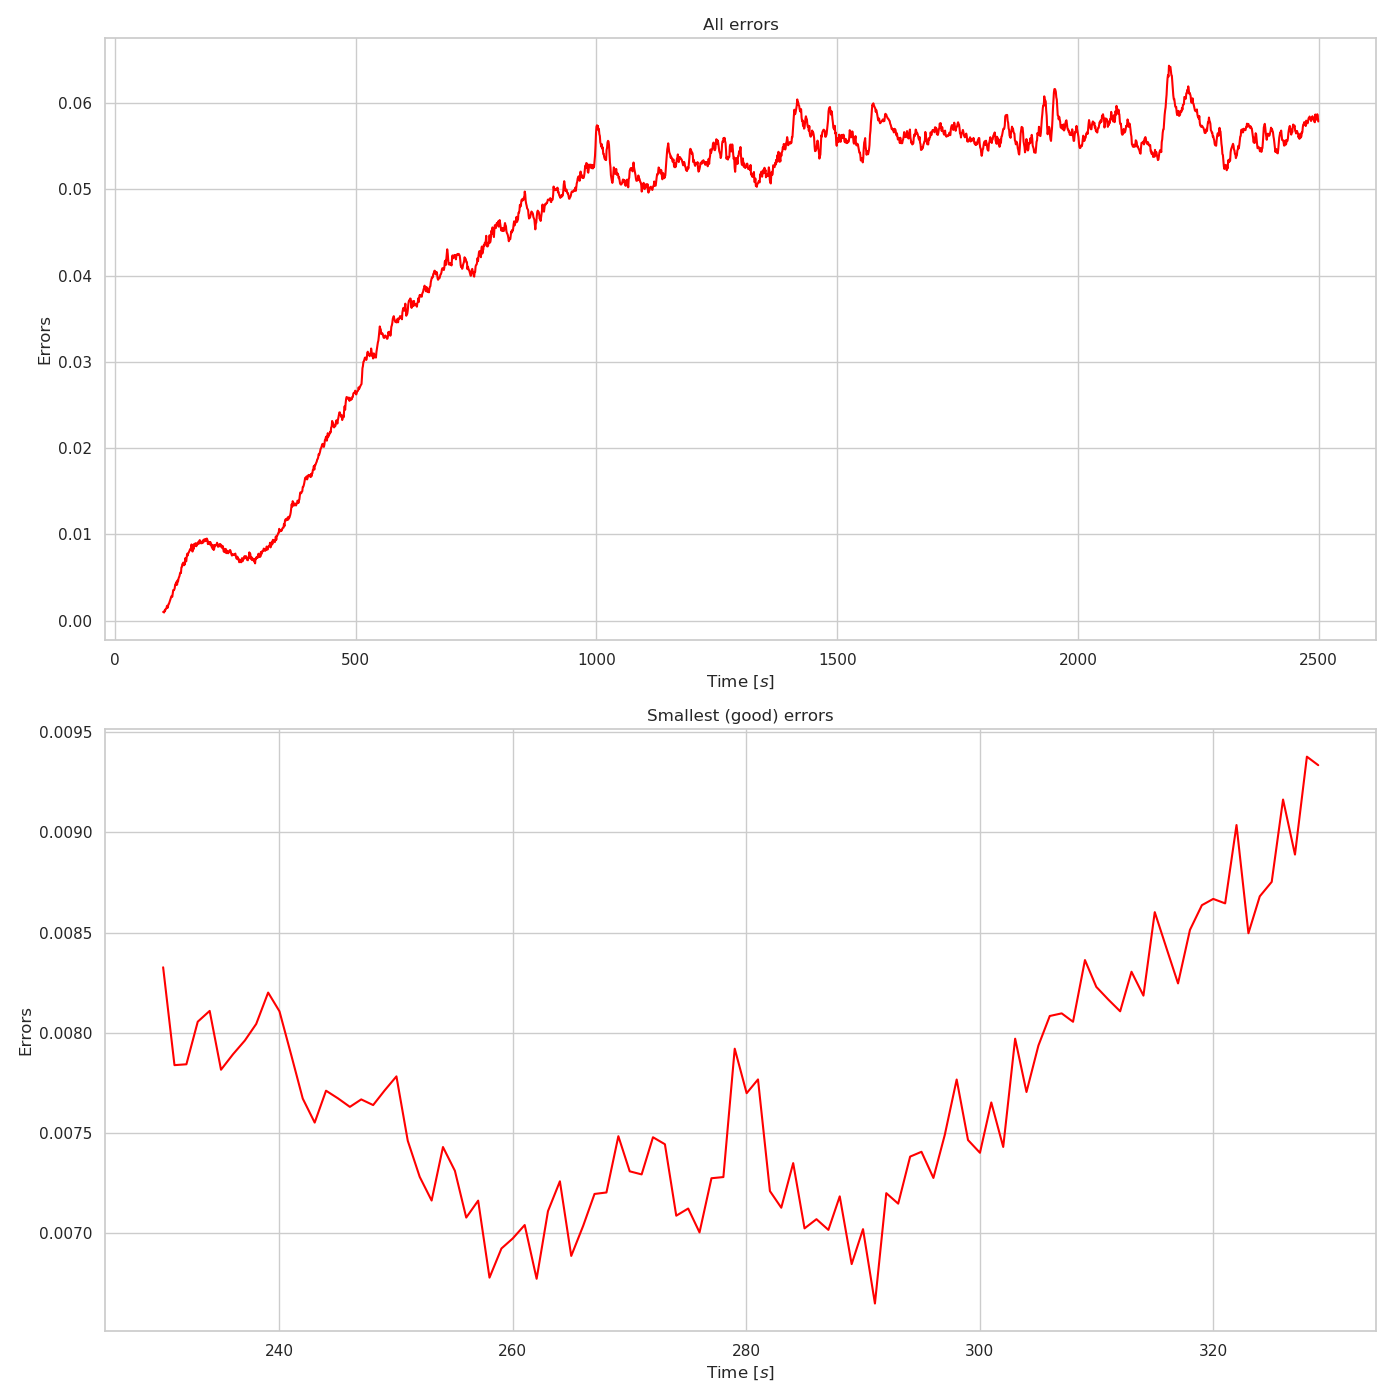

In [41]:
fig, axes =  plt.subplots(nrows=2, ncols=1, figsize=(14,14))

small_search_bottom = 230
small_search_upper = 330

axes[0].plot(hidegmeleg[bottom_cut:upper_cut,0]/1000, perr_linear[:,1], c='red')
axes[1].plot(times_arr_hideg[small_search_bottom - bottom_cut:small_search_upper - bottom_cut]/1000, (perr_linear[:,1])[small_search_bottom - bottom_cut:small_search_upper - bottom_cut], c='red')

axes[0].set_title('All errors')
axes[0].set_xlabel('Time [$s$]')
axes[0].set_ylabel('Errors')

axes[1].set_title('Smallest (good) errors')
axes[1].set_xlabel('Time [$s$]')
axes[1].set_ylabel('Errors')

fig.tight_layout()
plt.show()

Best fit at $\text{t} \approx 290\ \text{s}$, we use data from that position.

Exact location of smallest error:

In [42]:
smallest_err = min((perr_linear[:,1])[130:230])
smallest_err_loc = np.where(min((perr_linear[:,1])[130:230]) == perr_linear[:,1])[0][0]

print("Smllest error's location at " + str(bottom_cut + smallest_err_loc) + " s")

Smllest error's location at 291 s


<IPython.core.display.Javascript object>


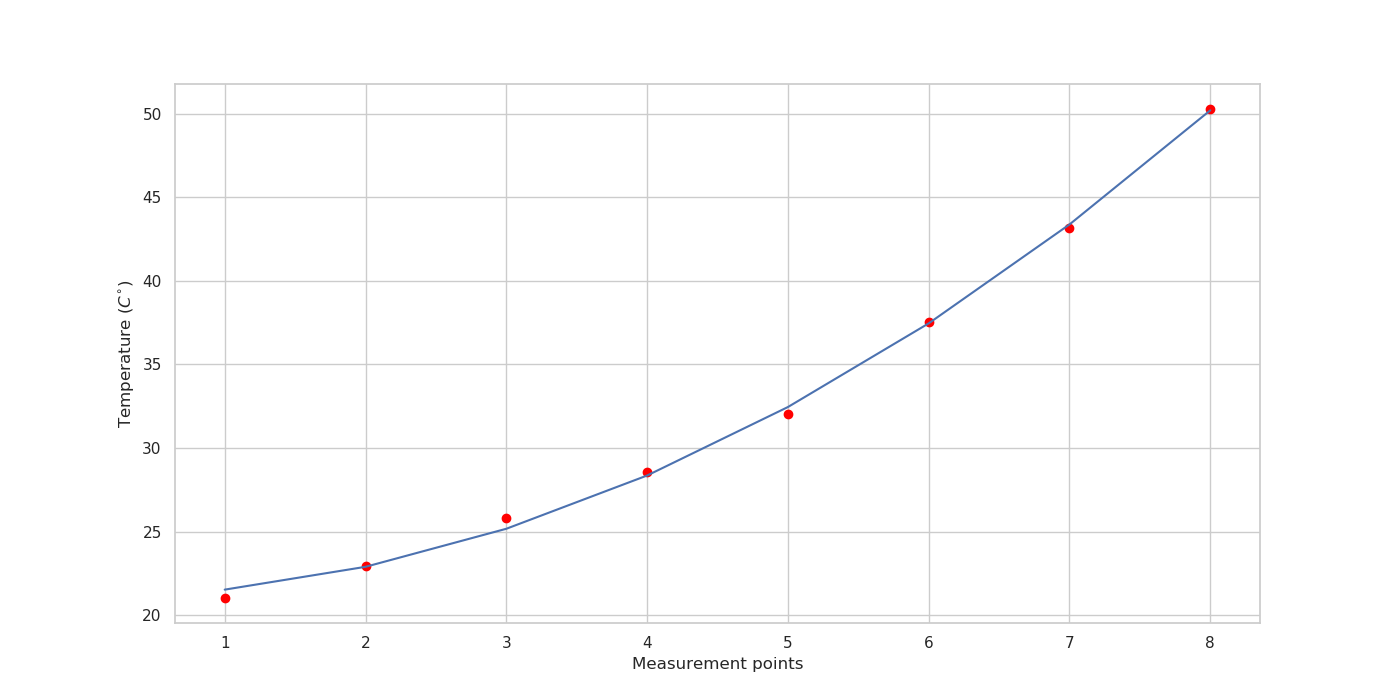

In [43]:
fig, axes = plt.subplots(figsize=(14,7))

plottable = smallest_err_loc

axes.scatter(x_arr_hg, temps_arr_hideg[plottable], c='red')
axes.plot(x_arr_hg, linear_part(x_arr_hg, *popt_linear[plottable]))

axes.set_xlabel('Measurement points')
axes.set_ylabel('Temperature ($C^{\circ}$)')

plt.show()

Tudjuk, hogy

$$
u(t) \propto A + B \cdot e^{C \cdot t}
$$

$$
u(x) \propto A + B \cdot x^{2}
$$

Így

$$
\frac{\partial u}{\partial t} \propto C \cdot B \cdot e^{C \cdot t}
$$

$$
\frac{\partial^{2} u}{\partial x^{2}} \propto 2 \cdot B
$$

In [44]:
popt_arr

{'0': array([ 2.81849750e+01, -1.89543247e+01, -1.89102392e-06]),
 '1': array([ 3.54433714e+01, -2.56289332e+01, -2.01202858e-06]),
 '2': array([ 4.28643558e+01, -3.51962978e+01, -2.18727196e-06]),
 '3': array([ 5.11276634e+01, -4.66403894e+01, -2.36291354e-06]),
 '4': array([ 6.01594577e+01, -5.89113011e+01, -2.49119388e-06]),
 '5': array([ 7.12474670e+01, -7.28842175e+01, -2.64294743e-06]),
 '6': array([ 8.13791134e+01, -8.50556716e+01, -2.75781571e-06]),
 '7': array([ 9.23269368e+01, -9.67943063e+01, -2.86770874e-06])}

In [45]:
dx = np.empty(len(temps_arr_hideg))
dt = np.empty((len(times_arr_hideg),8))

# u(t) = A + B * np.e ** (C * t)
# du/dt = C * B * np.e ** (C * t)

# u(x) = A + B * x^2
# d^2u/dx^2 = 2 * B

for i in range(0, len(temps_arr_hideg)):
    dx[i] = 2 * popt_linear[i][1]

    for k in range(0,8):
        dt[i,k] = popt_arr[str(k)][2] * popt_arr[str(k)][1] * np.e ** (popt_arr[str(k)][2] * times_arr_hideg[i])

<IPython.core.display.Javascript object>


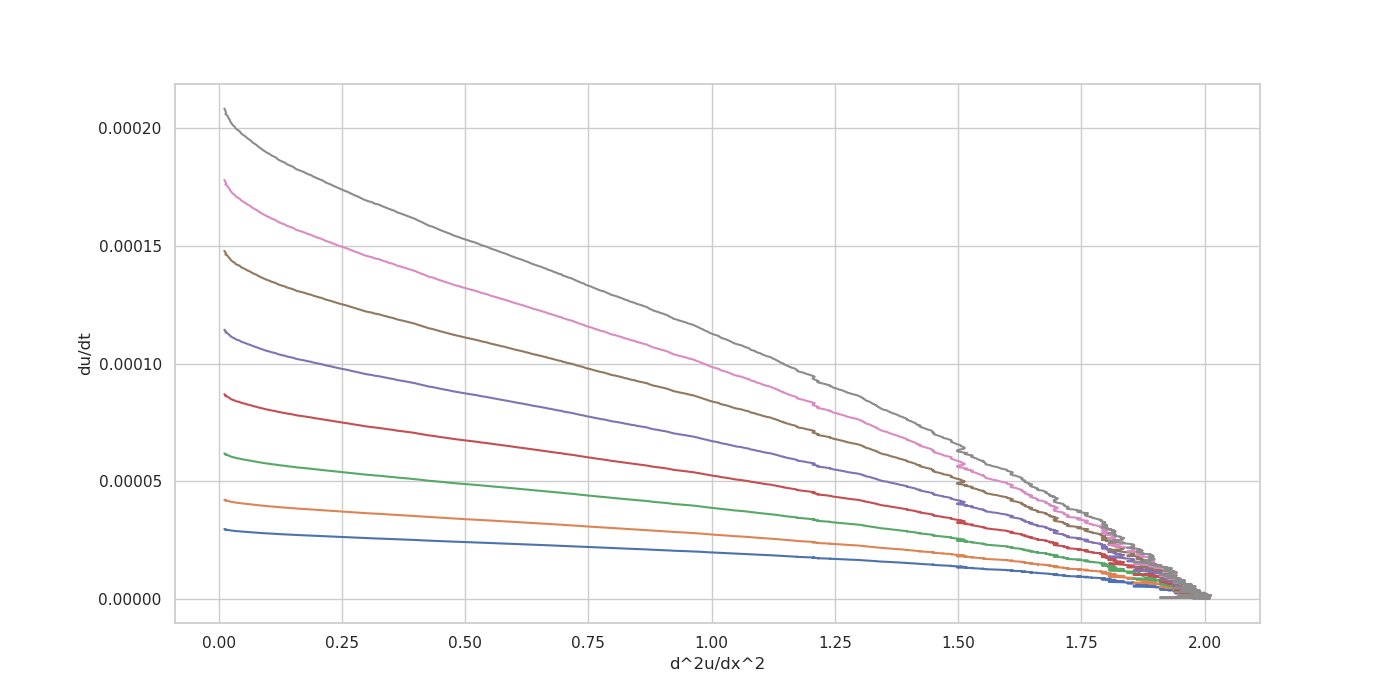

In [133]:
fig, axes = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes.plot(dx, dt[:,i])
    
axes.set_xlabel('d^2u/dx^2')
axes.set_ylabel('du/dt')
    
plt.show()

### Linear fit for curves

In [47]:
from scipy import stats

In [48]:
slope = np.empty(8)
intercept = np.empty(8)
r_value = np.empty(8)
p_value = np.empty(8)
std_err = np.empty(8)

for i in range(0,8):
    slope[i], intercept[i], r_value[i], p_value[i], std_err[i] = stats.linregress(dx, dt[:,i])

<IPython.core.display.Javascript object>


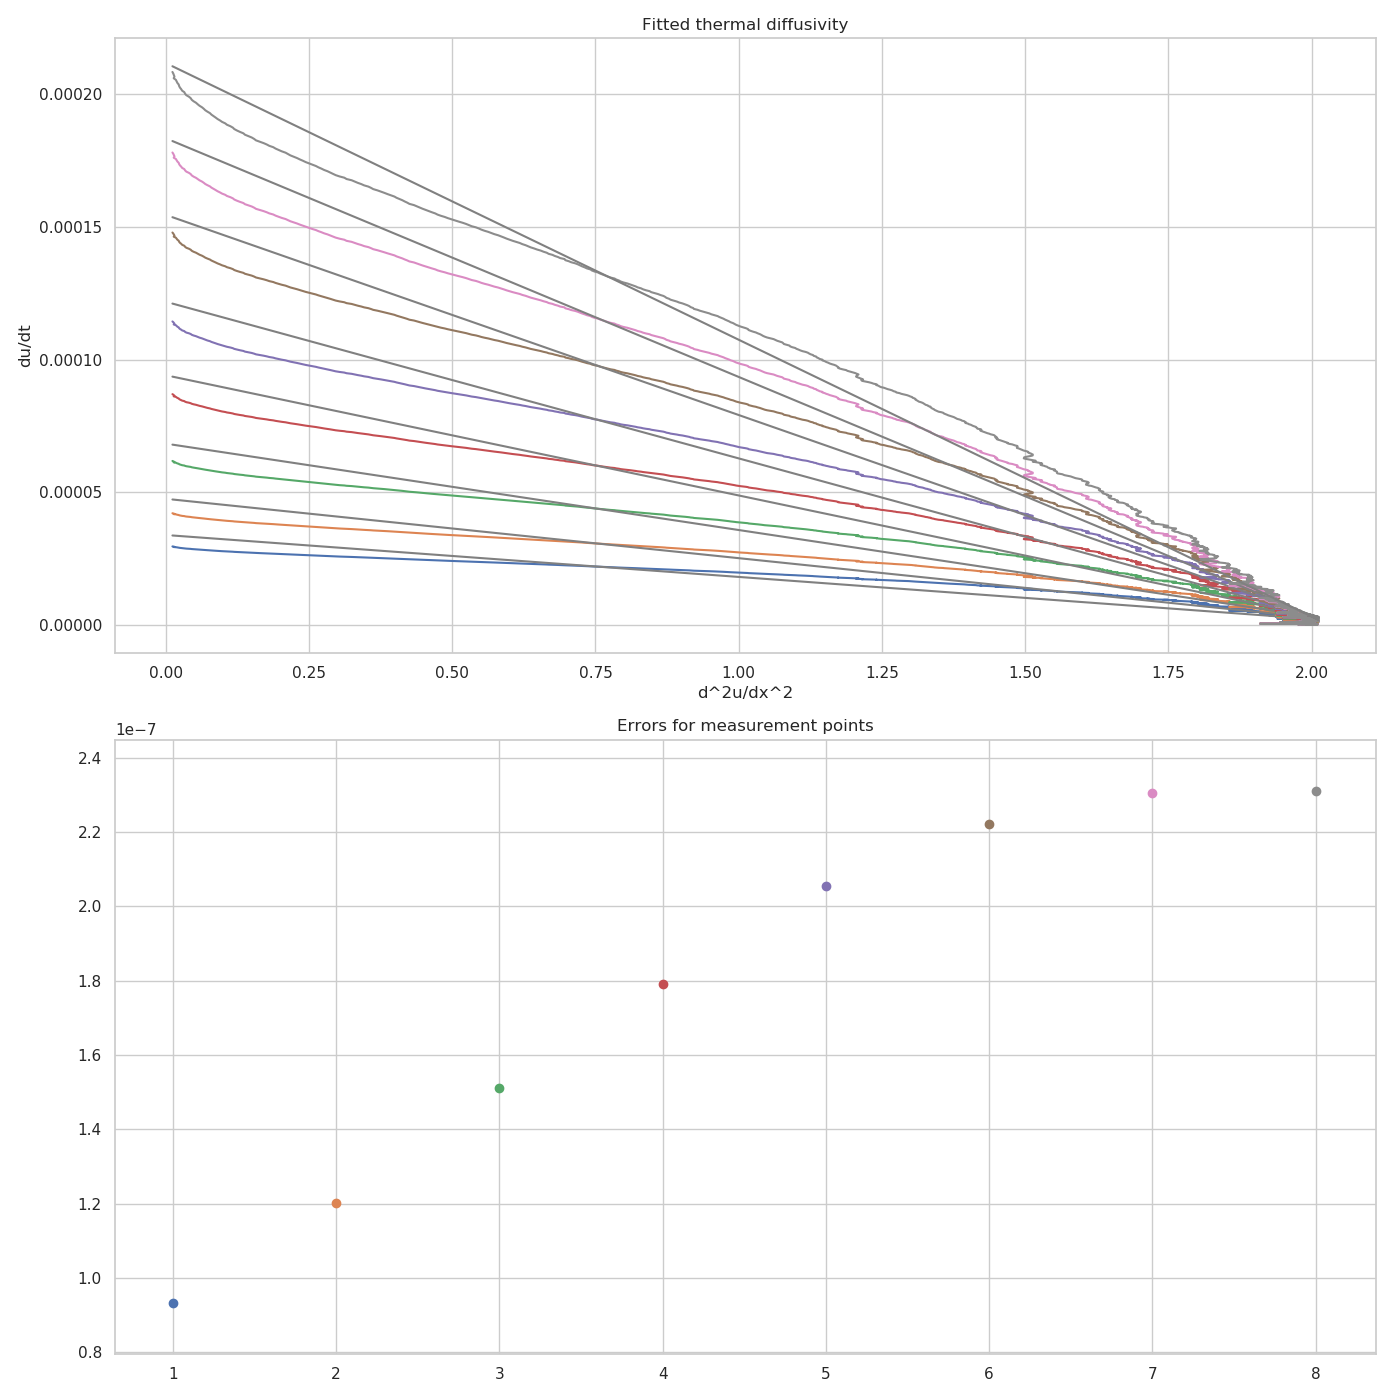

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,14))

for i in range(0,8):
    axes[0].plot(dx, (dt[:,i]))
    axes[0].plot(dx, intercept[i] + slope[i] * dx, c='grey')
    
    axes[1].scatter(x_arr_hg[i], std_err[i])
    

axes[0].set_title('Fitted thermal diffusivity')
axes[0].set_xlabel('d^2u/dx^2')
axes[0].set_ylabel('du/dt')

axes[1].set_title('Errors for measurement points')
axes[1].set_ylim(min(std_err) - (max(std_err) - min(std_err))/10, max(std_err) + (max(std_err) - min(std_err))/10)

fig.tight_layout()
plt.show()

In [50]:
# Mivel kb. 3 cm volt a hőmérők között és az időket ms-ban számoltuk, ezért át kell számítanunk a kapott értéket mm^2/s-ra
# 1/ms -> 1/s
slope_new = 1000 * slope

# * 3 cm^2 -> * mm^2
slope_new *= 100 * 3

In [160]:
for i in range(0,8):
    print("A kapott érték a TM #" + str(i+1) + " esetén: {0} * mm^2/s".format(np.abs(slope_new[i])))

A kapott érték a TM #1 esetén: 4.736342730412392 * mm^2/s
A kapott érték a TM #2 esetén: 6.70704095588673 * mm^2/s
A kapott érték a TM #3 esetén: 9.759187983879523 * mm^2/s
A kapott érték a TM #4 esetén: 13.581588695584085 * mm^2/s
A kapott érték a TM #5 esetén: 17.695096033155618 * mm^2/s
A kapott érték a TM #6 esetén: 22.609439805084648 * mm^2/s
A kapott érték a TM #7 esetén: 26.96108069382073 * mm^2/s
A kapott érték a TM #8 esetén: 31.259389419279305 * mm^2/s


Mechanikus buherálás:

In [161]:
print('Mean thermal diffusivity of copper between 30 and 90 celcius: {0} mm^2/s'.format((dt[:,0]/dx).mean() * 1000 * 100 * 3))

Mean thermal diffusivity of copper between 30 and 90 celcius: 6.261221761040354 mm^2/s


## Ugyanez a rángatott esetre

In [52]:
times_arr_gerj = gerj[min_lim_gerj:max_lim_gerj,0]
temps_arr_gerj = gerj[min_lim_gerj:max_lim_gerj,1:9]

In [53]:
popt_linear_gerj = []
pcov_linear_gerj = []
perr_linear_gerj = []

for i in range(0, len(temps_arr_gerj)):
    popt_current_gerj, pcov_current_gerj = curve_fit(linear_part, x_arr_hg, temps_arr_gerj[i], p0=[20, 1])
    perr_current_gerj = np.sqrt(np.diag(pcov_current_gerj))
    
    popt_linear_gerj.append(popt_current_gerj)
    pcov_linear_gerj.append(pcov_current_gerj)
    perr_linear_gerj.append(perr_current_gerj)
    
popt_linear_gerj = np.asarray(popt_linear_gerj)
pcov_linear_gerj = np.asarray(pcov_linear_gerj)
perr_linear_gerj = np.asarray(perr_linear_gerj)

<IPython.core.display.Javascript object>


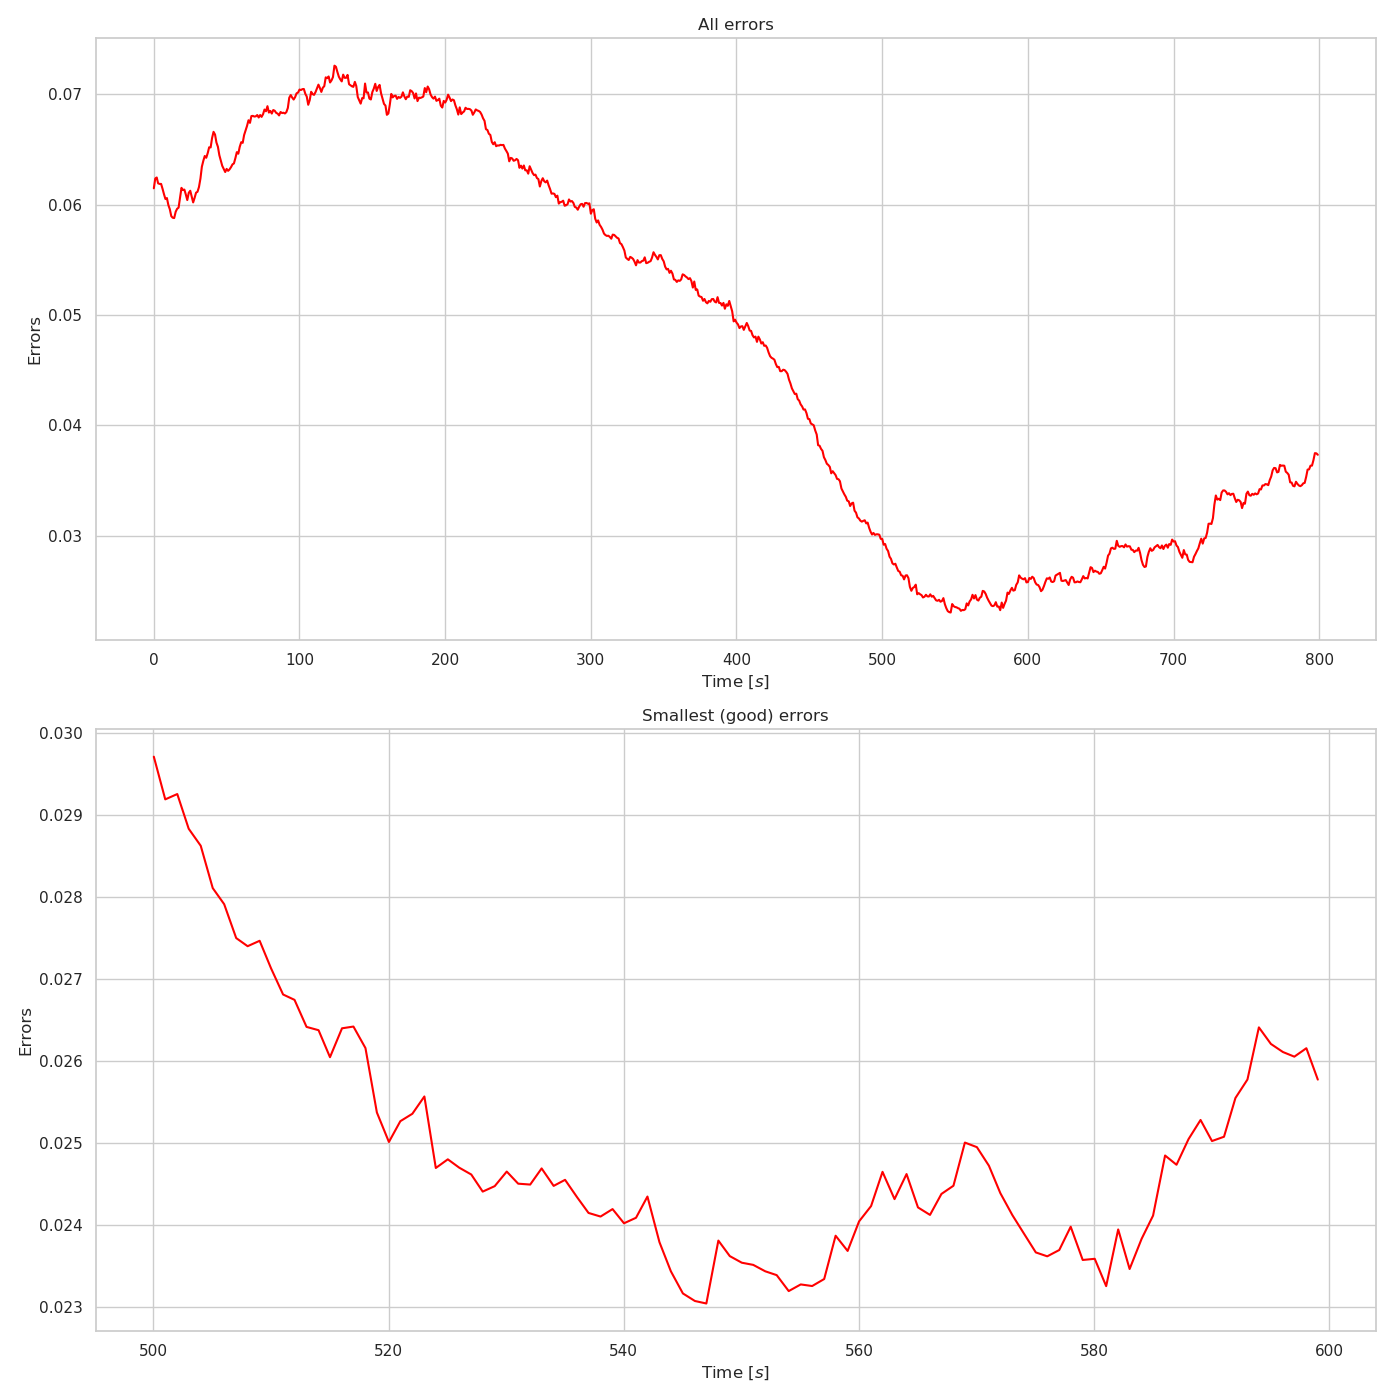

In [54]:
fig, axes =  plt.subplots(nrows=2, ncols=1, figsize=(14,14))

small_search_bottom_gerj = 500
small_search_upper_gerj = 600

axes[0].plot(gerj[min_lim_gerj:max_lim_gerj,0]/1000, perr_linear_gerj[:,1], c='red')
axes[1].plot(times_arr_gerj[small_search_bottom_gerj - min_lim_gerj:small_search_upper_gerj - max_lim_gerj]/1000, (perr_linear_gerj[:,1])[small_search_bottom_gerj - min_lim_gerj:small_search_upper_gerj - max_lim_gerj], c='red')

axes[0].set_title('All errors')
axes[0].set_xlabel('Time [$s$]')
axes[0].set_ylabel('Errors')

axes[1].set_title('Smallest (good) errors')
axes[1].set_xlabel('Time [$s$]')
axes[1].set_ylabel('Errors')

fig.tight_layout()
plt.show()

In [55]:
smallest_err_gerj = min((perr_linear_gerj[:,1])[small_search_bottom_gerj:small_search_upper_gerj])
smallest_err_loc_gerj = np.where(min((perr_linear_gerj[:,1])[small_search_bottom_gerj:small_search_upper_gerj]) == perr_linear_gerj[:,1])[0][0]

print("Smllest error's location at " + str(min_lim_gerj + smallest_err_loc_gerj) + " s")

Smllest error's location at 547 s


<IPython.core.display.Javascript object>


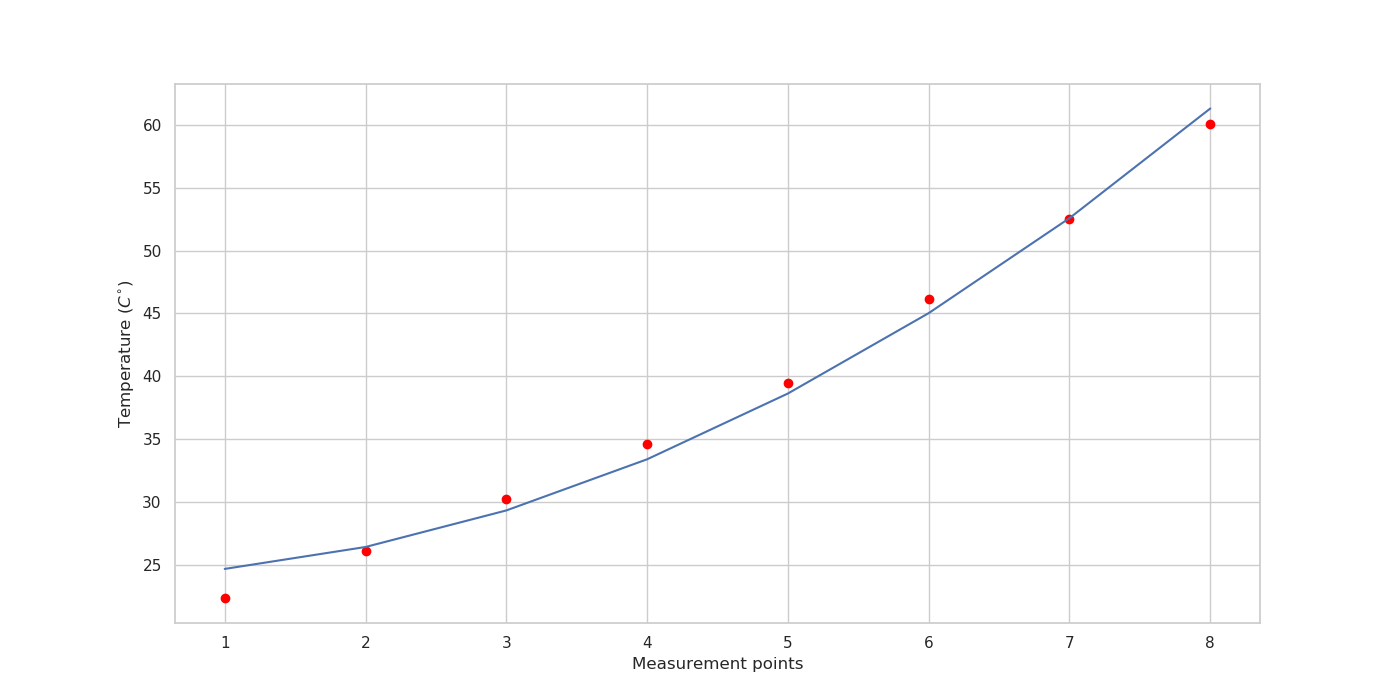

In [56]:
fig, axes = plt.subplots(figsize=(14,7))

plottable = smallest_err_loc_gerj

axes.scatter(x_arr_hg, temps_arr_gerj[plottable], c='red')
axes.plot(x_arr_hg, linear_part(x_arr_hg, *popt_linear_gerj[plottable]))

axes.set_xlabel('Measurement points')
axes.set_ylabel('Temperature ($C^{\circ}$)')

plt.show()

### du/dt számítása

### Fourier sor - Jelfeldolg. gyakorlatról

In [57]:
def FourierCoeff(signal, t, Complex=True):
    
    '''
    Parameters
    ----------
    signal : the periodic function's value as an np.array
    t: an np.linsapce array of points of time, where the signal got evalueted

    Returns
    -------
    if Complex == False, the function returns:

    a_0 : float
    a, b : np.float arrays describing respectively the cosine and sine coefficients

    =======
    if Complex == True, the function returns:

    c : 1-dimensional complex-valued np.array of size N+1
    '''

    # This function computes the one-dimensional n-point discrete Fourier Transform (DFT) 
    # of a real-valued array by means of an efficient algorithm called the Fast Fourier Transform (FFT)
    y = np.fft.rfft(signal) / t.size

    if(Complex):
        return(y)

    else:
        y *= 2
        return(y[0].real, y[1:-1].real, -y[1:-1].imag)

In [72]:
def FourierCalcComplex(c, t, N_max):
    
    # Sampling rate: 1000 Hz/second
    #SampRate = int(t * 1000)
    ReconstTime = t#np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array to store the reconstructed function's values
    ReconstFunc = np.empty(len(ReconstTime), dtype=np.complex_)
    
    # Calculate f(t) values by f(t) ~= {Sum}_k=-N->N (c_k*e^(i*2*pi*kt/T))
    for dt in range(0, len(ReconstTime)):
        ReconstFunc[dt] = 0
        
        for k in range(0, N_max+1):
            ReconstFunc[dt] += c[k] * cmath.exp(1.0j * 2 * np.pi * k * ReconstTime[dt] / max(ReconstTime))
        
        for k in range(1, N_max+1):
            ReconstFunc[dt] += np.conj(c[k]) * cmath.exp(1.0j * 2 * np.pi * (-k) * ReconstTime[dt] / max(ReconstTime))

    return(ReconstTime, ReconstFunc)

In [73]:
c = {}

for i in range(0,8):
    c[str(i+1)] = FourierCoeff(gerj[:,i+1], gerj[:,0], Complex=True)

In [75]:
ReconstTime = {}
ReconstFunc = {}

for i in range(0,8):
    ReconstTime[str(i+1)], ReconstFunc[str(i+1)] = FourierCalcComplex(c=c[str(i+1)], t=gerj[:,0], N_max=10)

<IPython.core.display.Javascript object>


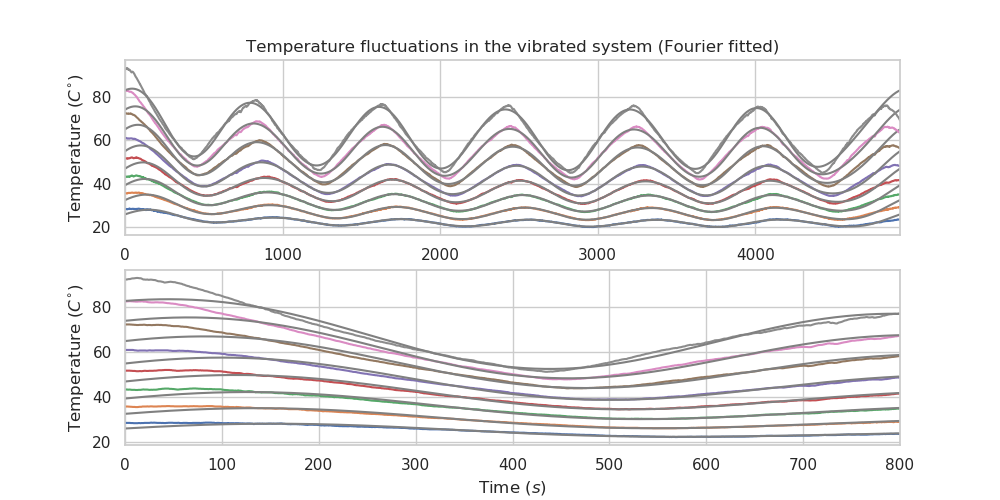

In [81]:
nrows=2
ncols=1
fig_gerj, axes_gerj = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,5))

min_lim_gerj = 0
max_lim_gerj = 800

for i in range(0,8):
    axes_gerj[0].plot(gerj[:,0]/1000, gerj[:,i+1], label="Thermometer #" + str(i+1))
    axes_gerj[0].plot(ReconstTime[str(i+1)]/1000, ReconstFunc[str(i+1)].real, c='grey')
    axes_gerj[1].plot(gerj[min_lim_gerj:max_lim_gerj,0]/1000, gerj[min_lim_gerj:max_lim_gerj,i+1], label="Thermometer #" + str(i+1))
    axes_gerj[1].plot(ReconstTime[str(i+1)][min_lim_gerj:max_lim_gerj]/1000, ReconstFunc[str(i+1)][min_lim_gerj:max_lim_gerj].real, c='grey')
    
axes_gerj[0].set_xlim(min(gerj[:,0]/1000), max(gerj[:,0]/1000))
axes_gerj[1].set_xlim(min_lim_gerj, max_lim_gerj)
    
axes_gerj[0].set_ylabel("Temperature ($C^{\circ}$)")

axes_gerj[1].set_xlabel("Time ($s$)")
axes_gerj[1].set_ylabel("Temperature ($C^{\circ}$)")

axes_gerj[0].set_title("Temperature fluctuations in the vibrated system (Fourier fitted)")

#plt.legend()
plt.show()

In [95]:
dx_gerj = np.empty(len(temps_arr_gerj))
dt_gerj = np.empty((len(times_arr_gerj),8), dtype='complex_')

# u(t) = sum_k{ c_k * e^{i * 2pi * k * t / T} } 
# du/dt = i * 2pi / T * sum_k{ c_k * k * e^{i * 2pi * k * t / T} }

# u(x) = A + B * x^2
# d^2u/dx^2 = 2 * B

T = 800

for i in range(0, len(temps_arr_gerj)):
    dx_gerj[i] = 2 * popt_linear_gerj[i][1]

    for k in range(0,8):
        dt_gerj[i,k] = 1.0j * 2 * np.pi / (T * 1000)
        
        summ = 0
        for ind in range(0, len((c[str(k+1)])[min_lim_gerj:max_lim_gerj])):
            summ += ((c[str(k+1)])[min_lim_gerj:max_lim_gerj])[ind] * ind * cmath.exp(1.0j * 2 * np.pi * ind * times_arr_gerj[ind] / (T * 1000))
            
        dt_gerj[i,k] *= summ

In [147]:
(dt_gerj[:,0].real/dx_gerj)

array([5.52444918e-05, 5.52663242e-05, 5.52595301e-05, 5.51529832e-05,
       5.50882877e-05, 5.50882877e-05, 5.49550313e-05, 5.48879265e-05,
       5.48314938e-05, 5.48300606e-05, 5.48023665e-05, 5.47427759e-05,
       5.47066081e-05, 5.47061326e-05, 5.47799452e-05, 5.48367496e-05,
       5.48133454e-05, 5.48946296e-05, 5.51090317e-05, 5.52813745e-05,
       5.52983765e-05, 5.53460379e-05, 5.53694122e-05, 5.54089012e-05,
       5.54601745e-05, 5.54767975e-05, 5.54841346e-05, 5.55571200e-05,
       5.55546678e-05, 5.55772370e-05, 5.56484993e-05, 5.56017896e-05,
       5.57051478e-05, 5.58207719e-05, 5.59443362e-05, 5.60484738e-05,
       5.60589588e-05, 5.61034390e-05, 5.62046563e-05, 5.63047281e-05,
       5.64203280e-05, 5.65485963e-05, 5.65333562e-05, 5.65755407e-05,
       5.65709634e-05, 5.65668954e-05, 5.65176167e-05, 5.64816011e-05,
       5.65653700e-05, 5.65679124e-05, 5.66167695e-05, 5.65923304e-05,
       5.66147320e-05, 5.67443986e-05, 5.67915110e-05, 5.69441378e-05,
      

<IPython.core.display.Javascript object>


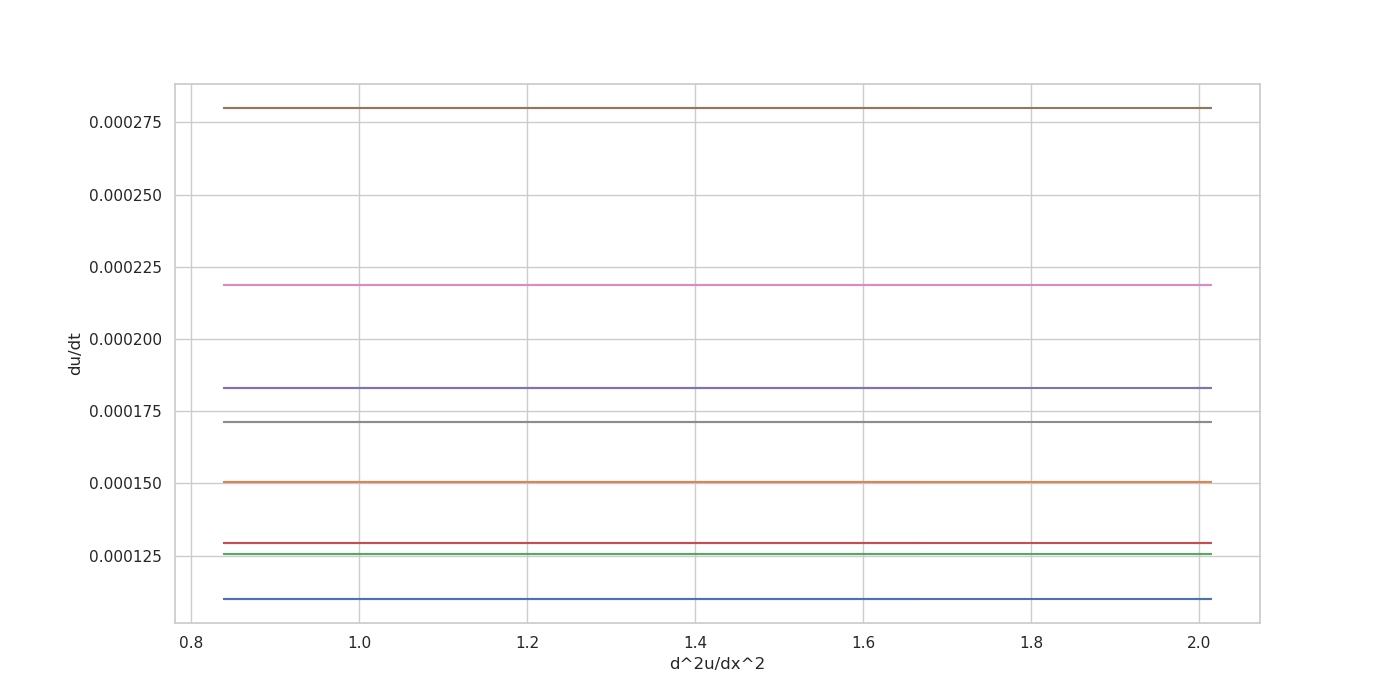

In [130]:
fig, axes = plt.subplots(figsize=(14,7))

for i in range(0,8):
    axes.plot(dx_gerj, dt_gerj[:,i].real)
    
axes.set_xlabel('d^2u/dx^2')
axes.set_ylabel('du/dt')
    
plt.show()

In [117]:
slope_gerj = np.empty(8)
intercept_gerj = np.empty(8)
r_value_gerj = np.empty(8)
p_value_gerj = np.empty(8)
std_err_gerj = np.empty(8)

for i in range(0,8):
    slope_gerj[i], intercept_gerj[i], r_value_gerj[i], p_value_gerj[i], std_err_gerj[i] = stats.linregress(dx_gerj, dt_gerj[:,i].real)

<IPython.core.display.Javascript object>


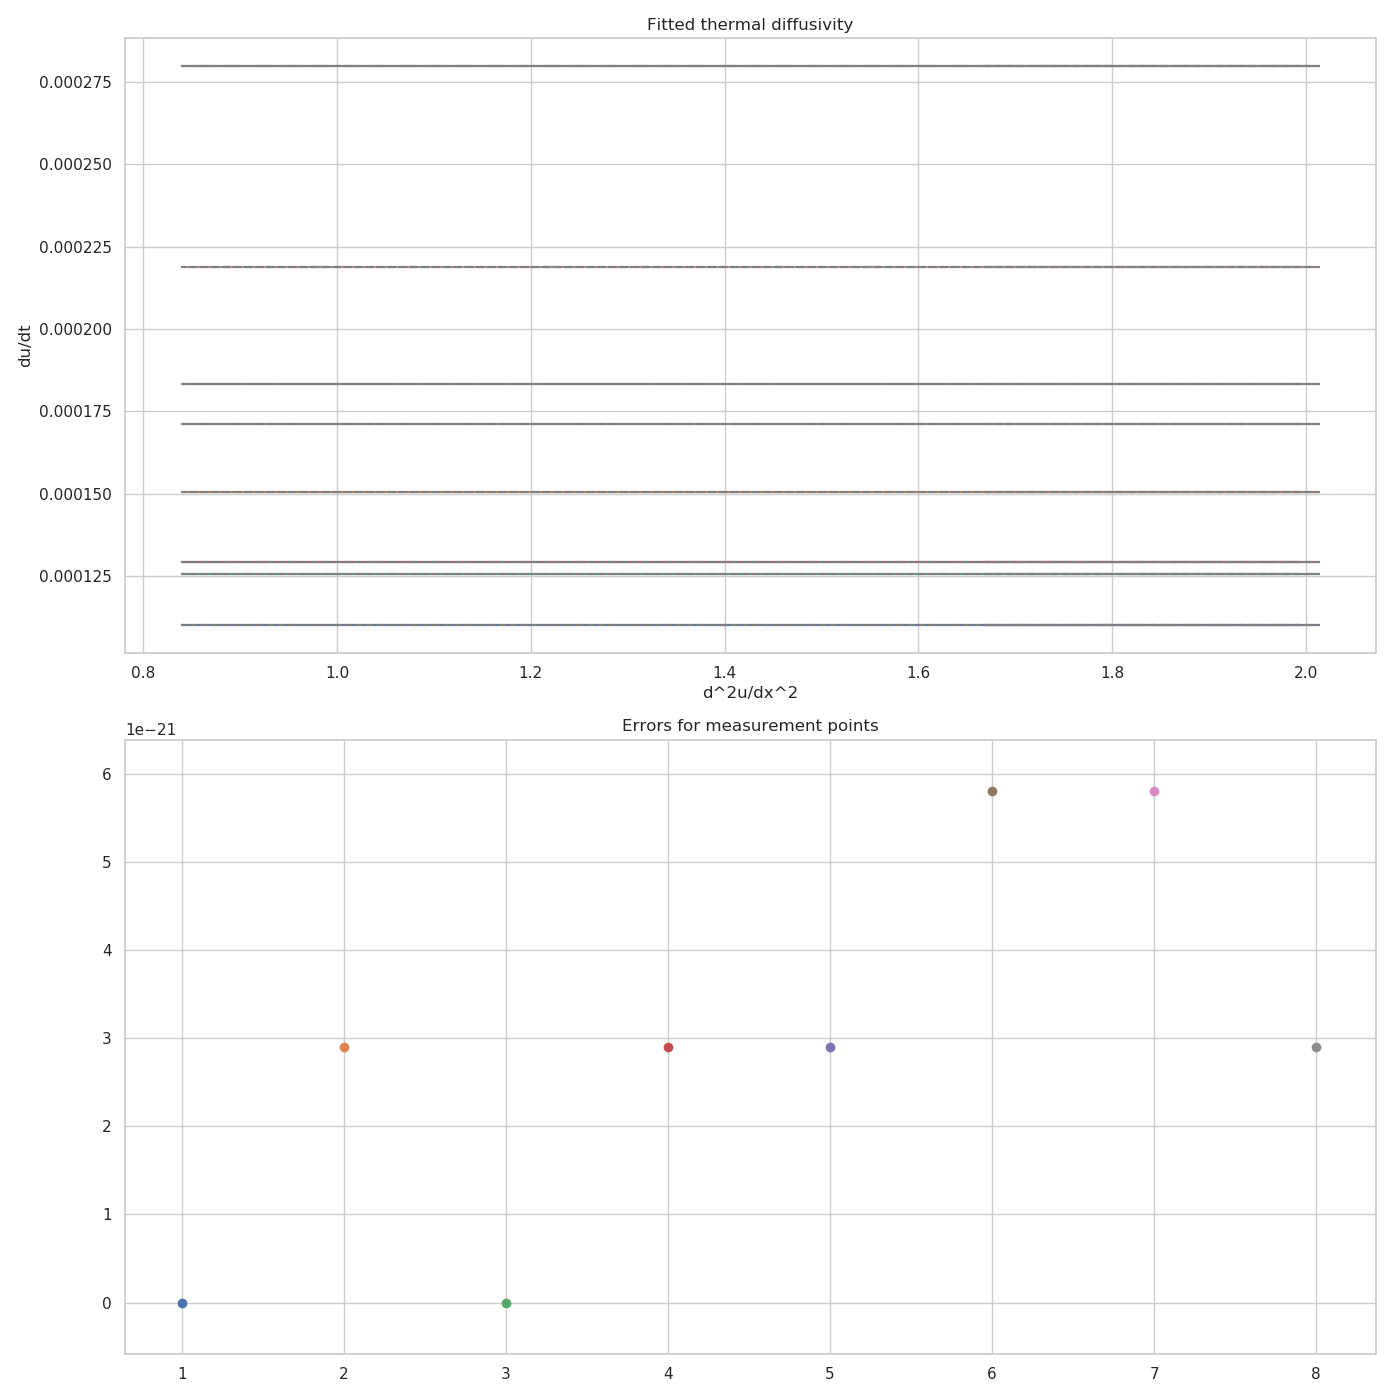

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,14))

for i in range(0,8):
    axes[0].plot(dx_gerj, (dt_gerj[:,i].real))
    axes[0].plot(dx_gerj, intercept_gerj[i] + slope_gerj[i] * dx_gerj, c='grey', linestyle='--', label='Fitted')
    
    axes[1].scatter(x_arr_hg[i], std_err_gerj[i])
    

axes[0].set_title('Fitted thermal diffusivity')
axes[0].set_xlabel('d^2u/dx^2')
axes[0].set_ylabel('du/dt')

axes[1].set_title('Errors for measurement points')
axes[1].set_ylim(min(std_err_gerj) - (max(std_err_gerj) - min(std_err_gerj))/10, max(std_err_gerj) + (max(std_err_gerj) - min(std_err_gerj))/10)

fig.tight_layout()
plt.show()

In [110]:
# Mivel kb. 3 cm volt a hőmérők között és az időket ms-ban számoltuk, ezért át kell számítanunk a kapott értéket mm^2/s-ra
# 1/ms -> 1/s
slope_new_gerj = 1000 * slope_gerj

# * 3 cm^2 -> * mm^2
slope_new_gerj *= 100 * 3

In [111]:
for i in range(0,8):
    print("A kapott érték a TM #" + str(i+1) + " esetén: {0} * mm^2/s".format(np.abs(slope_new_gerj[i])))

A kapott érték a TM #1 esetén: 0.0 * mm^2/s
A kapott érték a TM #2 esetén: 7.419302778971125e-30 * mm^2/s
A kapott érték a TM #3 esetén: 0.0 * mm^2/s
A kapott érték a TM #4 esetén: 7.419302778971125e-30 * mm^2/s
A kapott érték a TM #5 esetén: 7.419302778971125e-30 * mm^2/s
A kapott érték a TM #6 esetén: 1.483860555794225e-29 * mm^2/s
A kapott érték a TM #7 esetén: 1.483860555794225e-29 * mm^2/s
A kapott érték a TM #8 esetén: 7.419302778971125e-30 * mm^2/s


Itt a második esetben valamiért minden 0-ra jött a ki végén......

Manuális buherálás:

In [159]:
print('Mean thermal diffusivity of copper between 30 and 90 celcius: {0} mm^2/s'.format((dt_gerj[:,0].real/dx_gerj).mean() * 1000 * 100 * 3))

Mean thermal diffusivity of copper between 30 and 90 celcius: 26.203846908664843 mm^2/s


## A méréssel kapcsolatos észrevételek

__Kitölteni nem kötelező__: 
* Itt kérjük feltűntetni, hogy mennyi idő volt szükséges a feladatok elvégzéséhez. 
* Itt lehet javaslatot tenni a méréssel kapcsolatban.
* A méréssel kapcsolatban felmerült további ötletek.

A mérés kiértékelése kifejezettem izgalmas volt. Előzetesen kidolgozott támpontok nélkül a többihez képest relatív sok időt és energiát igényelt. A megoldáshoz szükséges Python tudást nem éreztem többnek, mint ami bármelyik másik Notebookhoz elvárható, bár ismerve a mostani évfolyamok tudásszintjét, a jegyzőkönyvben szereplő számos függvényillesztéshez szükséges trükk (ami a jegyzőkönyv nagyrészét tesz ki) meghaladhatja a többség ismereteit. Én magam is tanultam számomra teljesen új trükköket a kitöltés közben, amik szükségesek voltak a megoldáshoz, azonban ezeket remélhetőleg sikerül elsajátítanom.

Már jól meghatározott konkrétumok megadása mellett (amilyen a jövőben lesz majd a jegyzőkönyv), biztos kevesebb időt fog igényelni a megoldás, azonban az előző bekezdésben leírtak miatt általánosan a hallgatóknak szerintem nem lesz elég egy 4 órás laboralkalom.

A jegyzőkönyv tematikáját értékelni, vagy arra értékes javaslatot tenni nem szeretnék, mert egyáltalán nem érzem úgy, hogy elég szakmai, valamint pedagógiai tapasztalatom lenne bárhogyan is hozzá, azonban egy afféle "élményleírás" hallgatói szemszögből tudok rá adni. Az elvégzendő feladatok - habár összességében izgalmasak voltak - mégis nagyon egysíkúak. Az egész jegyzőkönyv igazából csak hosszadalmas függvényillesztések egymásutánja. Ez abból a tekintetből nem is gond, hogy az ember tulajdonképpen - sarkítva - fizikusként egész életében ilyesmit fog csinálni, ez nagyon hasznos gyakorlás. Másfelől viszont meg van bennem a félelem, hogy emiatt nem lehetne nagyon árnyalni a jegyzőkönyv értékelését. Ha valaki nagyon sok másban nagyon ügyes, viszont pont függvényillesztésben nem - bármi ok is van erre - az szinte biztosan meg fog szenvedni ezzel a méréssel, cserébe nem biztos, hogy értékelhető lesz egyáltalán a végére.